<a href="https://colab.research.google.com/github/alexgirmag/Predicting-Emergency-Department-Mortality-Risk-Using-Machine-Learning-Algorithms/blob/main/Data_prepa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laoding Data and important packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path1 =  "/content/drive/MyDrive/Mydf3223.xlsx"

In [4]:
Mydf = pd.read_excel(file_path1)

# Data Understanding

In [5]:
print(type(Mydf))

<class 'pandas.core.frame.DataFrame'>


In [6]:
Mydf.shape

(12440, 26)

Initially the data has 12440 entities and 26 colums/attributes.

In [7]:
Mydf.head()

,hr,sbp,dbp,rr,temp,spo2,rbs,Age,Gender,Outcome,...,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Hemoglobin,MCV,RDW,PLT
0,66.0,115.0,69,20.0,NaN,95.0,NaN,65.0,Female,alive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,90.0,70,22.0,NaN,93.0,142,33.0,Male,alive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100.0,117.0,63,20.0,NaN,90.0,182,51.0,Female,NaN,...,87.1,9.6,3.2,0.0,0.1,5.17,14.8,86.1,NaN,NaN
3,91.0,118.0,64,18.0,NaN,96.0,NaN,51.0,Female,NaN,...,87.1,9.6,3.2,0.0,0.1,5.17,14.8,86.1,NaN,NaN
4,111.0,142.0,78,22.0,NaN,81.0,NaN,50.0,Male,alive,...,88.4,3.7,5.9,2.0,NaN,5.72,15.6,90.8,13.9,392.0


In [8]:
Mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12440 entries, 0 to 12439
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hr             12360 non-null  float64
 1   sbp            12329 non-null  float64
 2   dbp            12326 non-null  object 
 3   rr             12339 non-null  float64
 4   temp           2667 non-null   object 
 5   spo2           12119 non-null  float64
 6   rbs            3350 non-null   object 
 7   Age            12349 non-null  float64
 8   Gender         12440 non-null  object 
 9   Outcome        8829 non-null   object 
 10  Assessment     7962 non-null   object 
 11  Waiting Time   11306 non-null  float64
 12  Visit type     11214 non-null  object 
 13  Case Category  11307 non-null  object 
 14  Triage color   11185 non-null  object 
 15  WBC            10126 non-null  float64
 16  Neutrophil     10011 non-null  float64
 17  Lymphocyte     10011 non-null  float64
 18  Monocy

**Number of Categorical vs Numerical variables**

In [9]:
# Convert numerical columns to numerical type
cols = ['dbp', 'temp', 'rbs','RBC']
Mydf[cols] = Mydf[cols].apply(pd.to_numeric,errors='coerce')

In [10]:

print("\n=== Variable Types ===")
categorical = Mydf.select_dtypes(include=['object', 'category', 'bool']).columns
numerical = Mydf.select_dtypes(include=['int64', 'float64', 'datetime64']).columns

print(f"Categorical variables ({len(categorical)}): {list(categorical)}")
print(f"Numerical variables ({len(numerical)}): {list(numerical)}")


=== Variable Types ===
Categorical variables (6): ['Gender', 'Outcome', 'Assessment', 'Visit type', 'Case Category', 'Triage color']
Numerical variables (20): ['hr', 'sbp', 'dbp', 'rr', 'temp', 'spo2', 'rbs', 'Age', 'Waiting Time', 'WBC', 'Neutrophil', 'Lymphocyte', 'Monocyte', 'Eosinophil', 'Basophil', 'RBC', 'Hemoglobin', 'MCV', 'RDW', 'PLT']


**Numerical Variables Summary**

---



In [11]:
# Generate the summary statistics
numerical_summary = Mydf[numerical].describe().T

# Set display options to print the whole output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(numerical_summary)



                count        mean         std    min     25%     50%     75%  \
hr            12360.0   92.038430   23.480954  1.000   79.00   89.00  102.00   
sbp           12329.0  121.574094   90.330246  0.000  105.00  116.00  131.00   
dbp           12325.0   73.602353   77.482246  0.000   63.00   71.00   80.00   
rr            12339.0   20.354648   10.494694  0.000   18.00   20.00   20.00   
temp           2656.0   36.231608    3.634281  0.000   36.00   36.00   36.50   
spo2          12119.0   94.248370   14.177134  2.000   93.00   95.00   96.00   
rbs            3334.0  201.503299  193.747018  0.000  118.00  154.50  241.00   
Age           12349.0   43.759171   19.807949  0.000   27.00   41.00   60.00   
Waiting Time  11306.0    5.046170   13.431820  1.000    3.00    3.00    5.00   
WBC           10126.0    9.772449    5.900857  0.100    6.00    8.54   12.14   
Neutrophil    10011.0   74.235945   71.453224  0.000   63.16   75.50   85.30   
Lymphocyte    10011.0   19.496804   38.0

In [ ]:

# Save to Excel
numerical_summary.to_excel('numerical_summary.xlsx', sheet_name='Summary Stats')


In [ ]:
from google.colab import files

files.download('numerical_summary.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Number of Missing values in each columns**

In [ ]:

print("\n=== Missing Values ===")
missing = Mydf.isnull().sum()
missing_percent = (missing / len(Mydf)) * 100
missing_Mydf = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
print(missing_Mydf.sort_values(by='Missing Count', ascending=False))


=== Missing Values ===
               Missing Count  Missing %
temp                    9784  78.649518
rbs                     9106  73.199357
RDW                     5974  48.022508
PLT                     5201  41.808682
Assessment              4478  35.996785
Basophil                3994  32.106109
Outcome                 3611  29.027331
Eosinophil              2847  22.885852
Monocyte                2496  20.064309
MCV                     2434  19.565916
Neutrophil              2429  19.525723
Lymphocyte              2429  19.525723
RBC                     2422  19.469453
WBC                     2314  18.601286
Hemoglobin              2308  18.553055
Triage color            1255  10.088424
Visit type              1226   9.855305
Waiting Time            1134   9.115756
Case Category           1133   9.107717
spo2                     321   2.580386
dbp                      115   0.924437
sbp                      111   0.892283
rr                       101   0.811897
Age             

**Drop rows if there is any duplicated rows**

In [12]:
Mydf1 = Mydf.drop_duplicates()

In [13]:
Mydf1.shape

(12440, 26)

**Drop rows where dependent variable is missing**

In [14]:
# 'Outcome' is my dependent variable
dependent_vars = ['Outcome']


Mydf2 = Mydf1.dropna(subset=dependent_vars).copy()

print(Mydf2.shape)
print(f"\nDropped {len(Mydf1) - len(Mydf2)} rows with missing dependent variables")
print("\nMissing values after dropping rows with missing dependent variables:")
print(Mydf2.isnull().sum().sort_values( ascending=False))

(8829, 26)

Dropped 3611 rows with missing dependent variables

Missing values after dropping rows with missing dependent variables:
temp             6805
rbs              6112
RDW              3642
Assessment       3151
PLT              3008
Basophil         2766
Eosinophil       1891
Monocyte         1597
Lymphocyte       1558
MCV              1558
Neutrophil       1557
RBC              1549
WBC              1442
Hemoglobin       1439
Visit type        856
Triage color      854
Waiting Time      775
Case Category     774
spo2              218
Age                77
dbp                76
sbp                72
rr                 65
hr                 51
Outcome             0
Gender              0
dtype: int64


**Histograms/Boxplots For Numerical Features.**

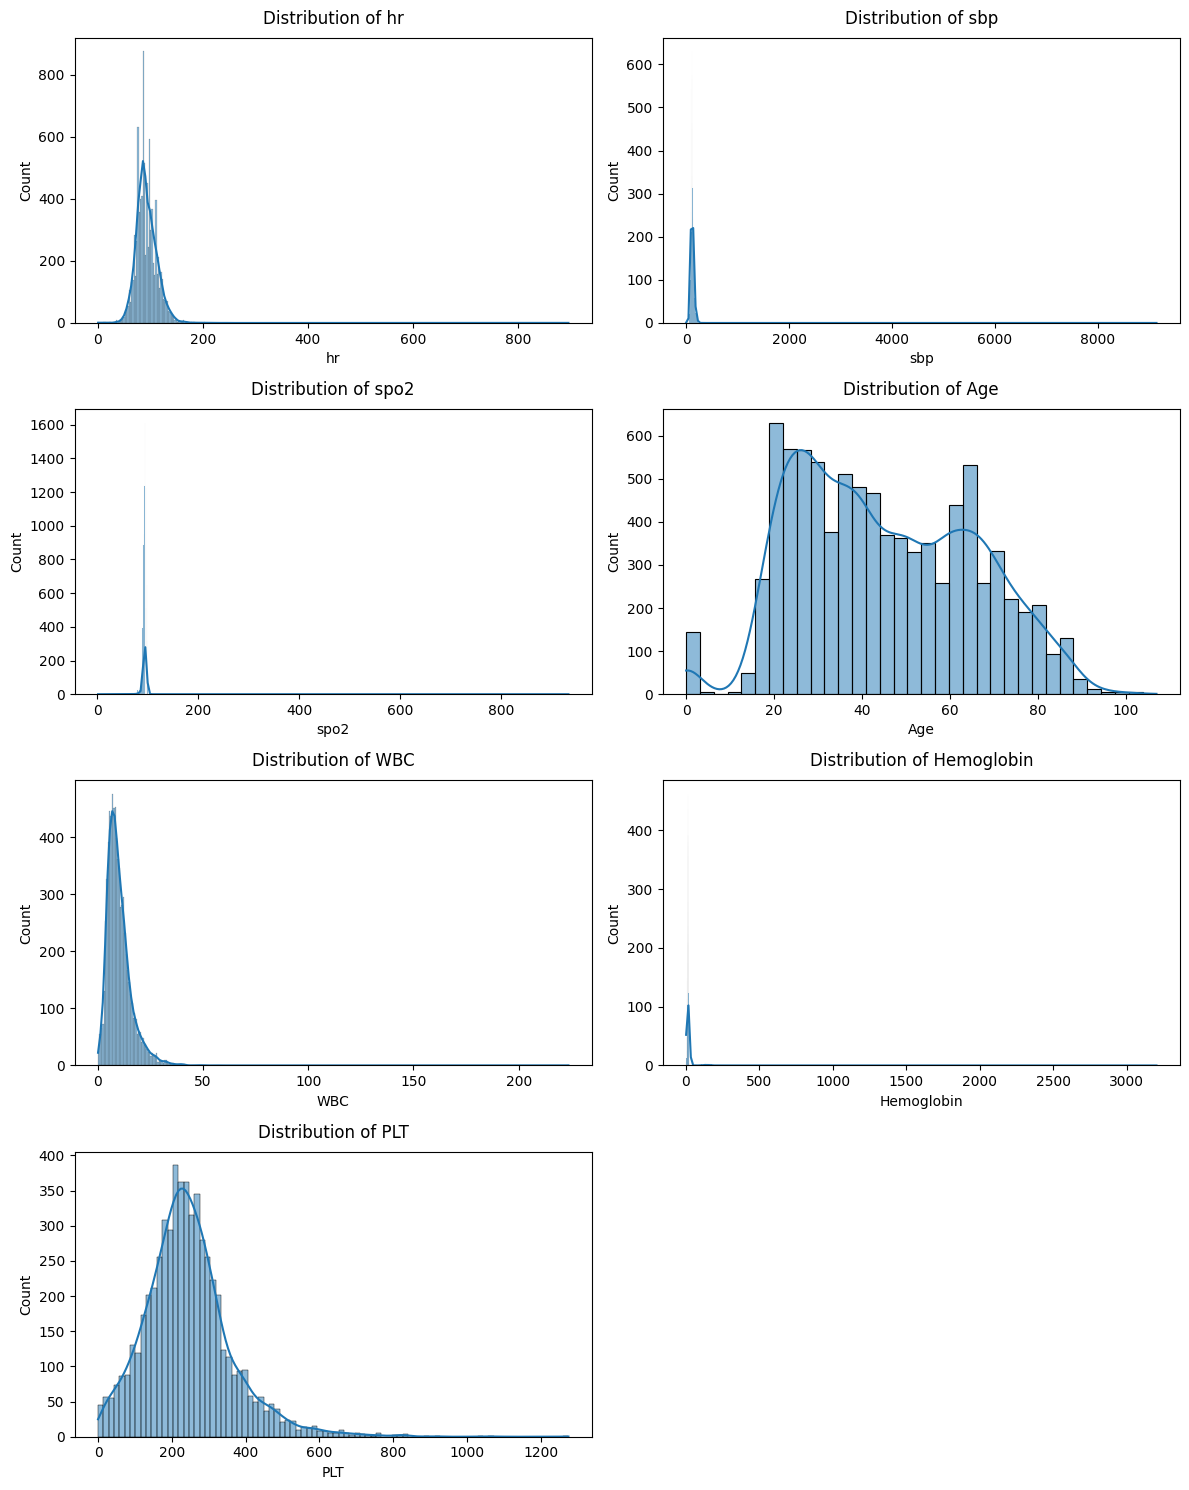

In [ ]:


def plot_numerical_grid(df, numerical_cols, n_cols=3):
    """Plot numerical variables in a grid layout."""
    # Filter only columns that exist in DataFrame
    cols_to_plot = [col for col in numerical_cols if col in df.columns]
    n_rows = (len(cols_to_plot) - 1) // n_cols + 1

    fig, axes = plt.subplots(4, 2, figsize=(n_cols*4, n_rows*5))
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', pad=10)

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Now IT IS
target_vars = ['hr', 'sbp', 'spo2', 'Age', 'WBC', 'Hemoglobin', 'PLT']
plot_numerical_grid(Mydf2, target_vars)

**Count Plots/Bar Plots For Categorical Features.**

/tmp/ipython-input-2072616863.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  (pd.api.types.is_categorical_dtype(df[col])


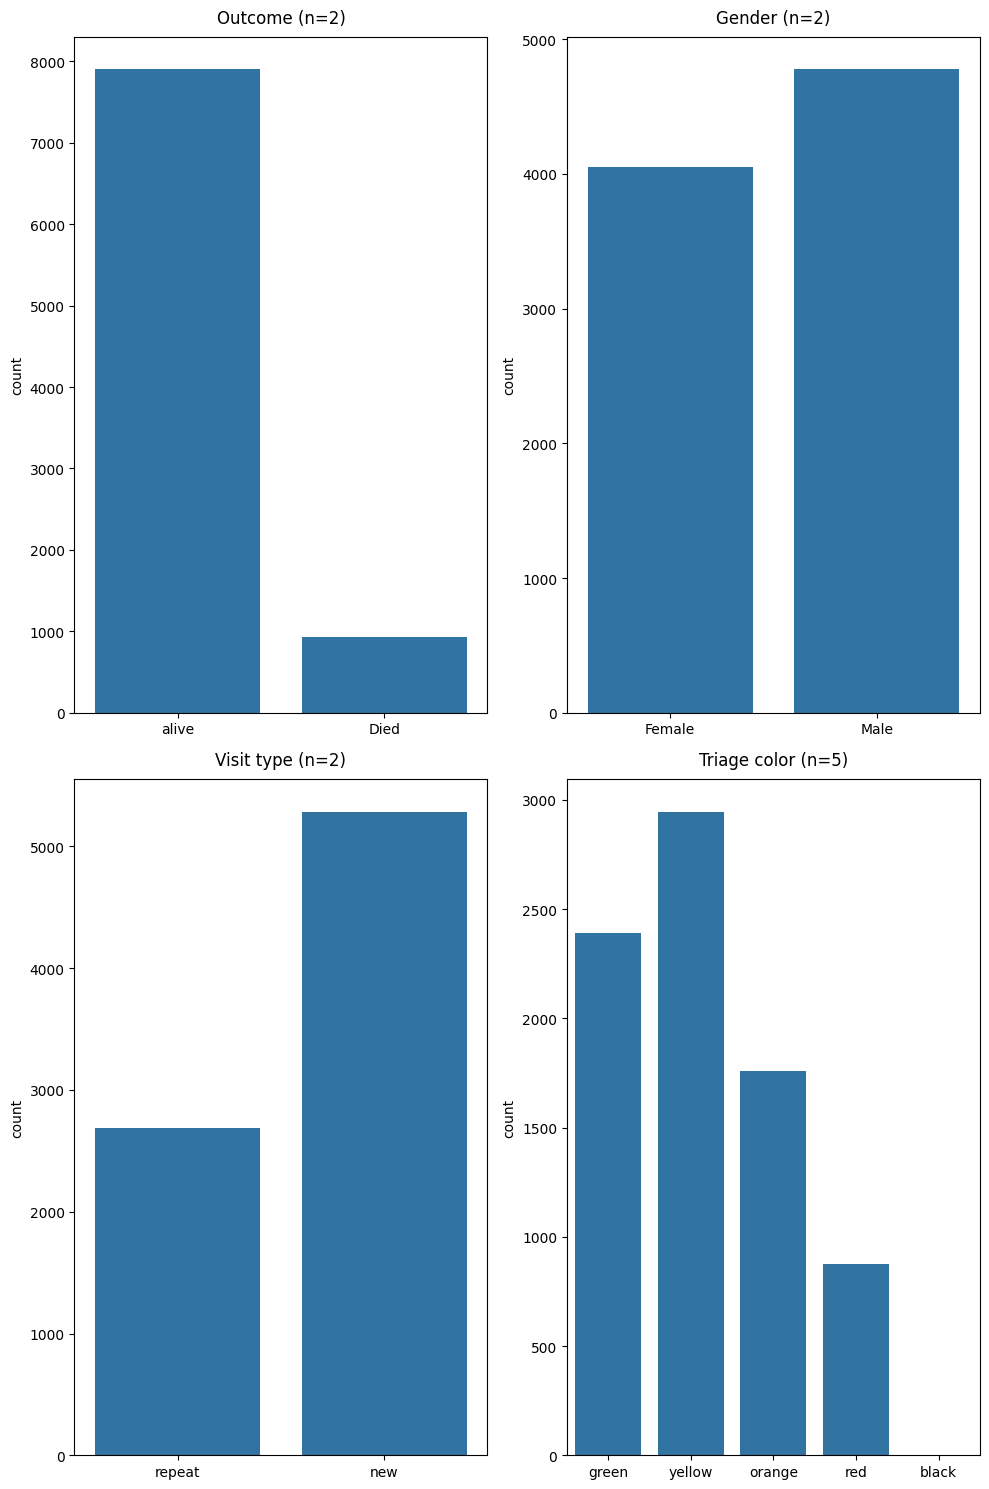

In [ ]:


def plot_categorical_grid(df, categorical_cols, n_cols=3, top_n=10):

    # Filter existing categorical columns
    cols_to_plot = [col for col in categorical_cols
                   if col in df.columns and
                   (pd.api.types.is_categorical_dtype(df[col])
                   or pd.api.types.is_object_dtype(df[col]))][:8]  # Max 8 plots

    # Create 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(10, 15))
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):

        if df[col].nunique() > top_n:
            top_cats = df[col].value_counts().nlargest(top_n).index
            plot_data = df[df[col].isin(top_cats)]
            sns.countplot(x=col, data=plot_data, order=top_cats, ax=axes[i])
        else:
            sns.countplot(x=col, data=df, ax=axes[i])

        axes[i].set_title(f'{col} (n={df[col].nunique()})', pad=10)
        axes[i].set_xlabel('')

        # Rotate x-labels only if needed
        if len(axes[i].get_xticklabels()) > 5:
            axes[i].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example Usage:
categorical_cols = ['Outcome', 'Gender', 'Visit type', 'Triage color']
plot_categorical_grid(Mydf2, categorical_cols)

**Drop variables that has > 50% missing values.**

In [15]:
Mydf3 = Mydf2.drop(columns=Mydf2.columns[Mydf2.isnull().mean() > 0.5])

In [16]:
Mydf3.shape

(8829, 24)

**Boxplot Grid for Numerical Variables to show outliers**

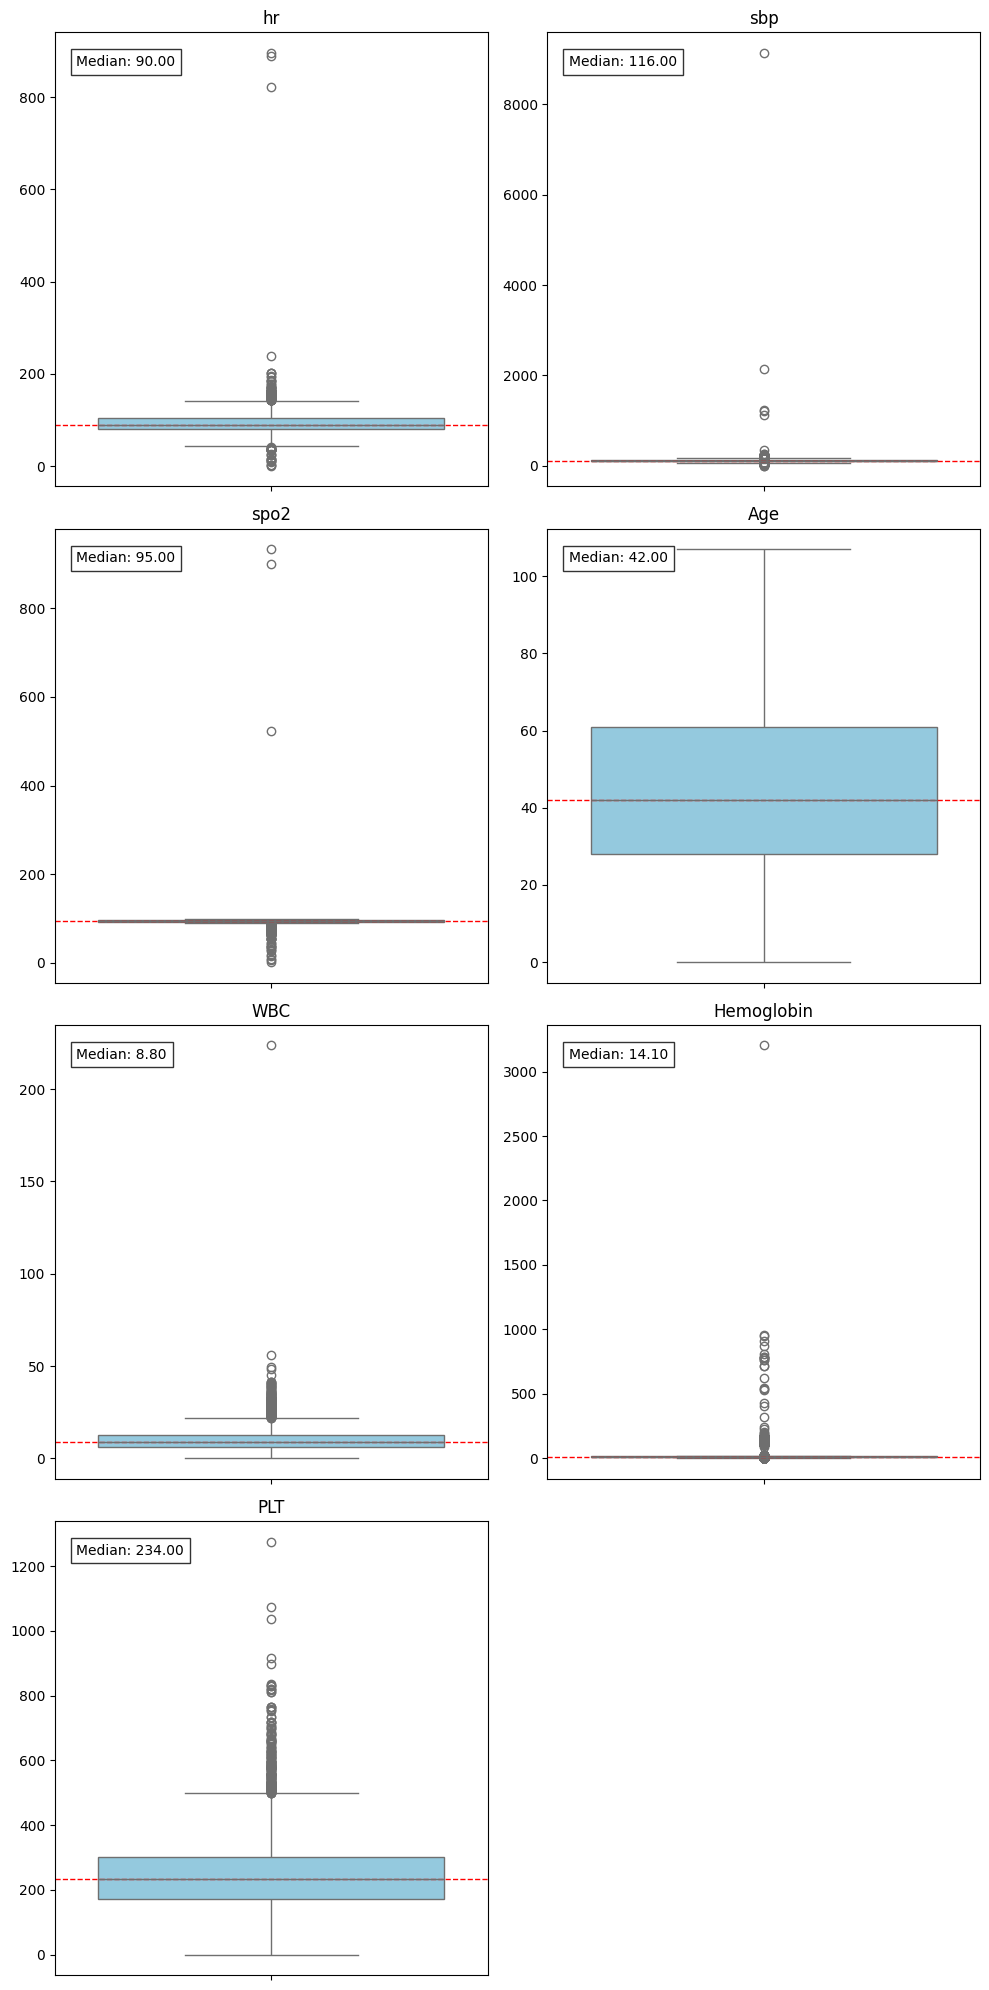

In [ ]:
def plot_boxplot_grid(df, numerical_cols, n_cols=3):

    # Filter existing numerical columns (limit to 8)
    cols_to_plot = [col for col in numerical_cols if col in df.columns][:8]

    # Setup 3x3 grid
    fig, axes = plt.subplots(4, 2, figsize=(10, 20))
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel('')

        # Add median value annotation
        median = df[col].median()
        axes[i].axhline(median, color='red', linestyle='--', linewidth=1)
        axes[i].text(0.05, 0.95, f'Median: {median:.2f}',
                    transform=axes[i].transAxes,
                    verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.8))

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example Usage:
numerical_vars = ['hr', 'sbp', 'spo2', 'Age', 'WBC', 'Hemoglobin', 'PLT']
plot_boxplot_grid(Mydf3, numerical_vars)

# Data Cleaning

In [17]:
Mydf3['Outcome'] = Mydf3['Outcome'].map({'alive': 0, 'Died': 1})

In [18]:
Mydf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 0 to 12438
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hr             8778 non-null   float64
 1   sbp            8757 non-null   float64
 2   dbp            8753 non-null   float64
 3   rr             8764 non-null   float64
 4   spo2           8611 non-null   float64
 5   Age            8752 non-null   float64
 6   Gender         8829 non-null   object 
 7   Outcome        8829 non-null   int64  
 8   Assessment     5678 non-null   object 
 9   Waiting Time   8054 non-null   float64
 10  Visit type     7973 non-null   object 
 11  Case Category  8055 non-null   object 
 12  Triage color   7975 non-null   object 
 13  WBC            7387 non-null   float64
 14  Neutrophil     7272 non-null   float64
 15  Lymphocyte     7271 non-null   float64
 16  Monocyte       7232 non-null   float64
 17  Eosinophil     6938 non-null   float64
 18  Basophil    

## Outlier Handling

**Outlier Handling**

In [ ]:
lower_bound_age = Mydf3['Age'].quantile(0.025)
upper_bound_age = Mydf3['Age'].quantile(0.9999)

In [ ]:
print(lower_bound_age,upper_bound_age)

16.0 103.49959999999555


In [ ]:
# Cap the outliers
Mydf3['Age'] = np.where(Mydf3['Age'] < lower_bound_age, lower_bound_age,
                              np.where(Mydf3['Age'] > upper_bound_age, upper_bound_age, Mydf3['Age']))

In [ ]:
lower_bound_Triage =Mydf3['Waiting Time'].quantile(0.001)
upper_bound_Triage = Mydf3['Waiting Time'].quantile(0.99)

In [ ]:
print(lower_bound_Triage,upper_bound_Triage)

1.0 36.0


In [ ]:
# Cap the outliers
Mydf3['Waiting Time'] = np.where(Mydf3['Waiting Time'] < lower_bound_Triage, lower_bound_Triage,
                              np.where(Mydf3['Waiting Time'] > upper_bound_Triage, upper_bound_Triage, Mydf3['Waiting Time']))

In [ ]:
lower_bound_hr = Mydf3['hr'].quantile(0.005)
upper_bound_hr = Mydf3['hr'].quantile(0.995)

In [ ]:
print(lower_bound_hr,upper_bound_hr)

47.0 156.0


In [ ]:
# Cap the outliers
Mydf3['hr'] = np.where(Mydf3['hr'] < lower_bound_hr, lower_bound_hr,
                    np.where(Mydf3['hr'] > upper_bound_hr, upper_bound_hr, Mydf3['hr']))

In [ ]:
lower_bound_SBP = Mydf3['sbp'].quantile(0.005)
upper_bound_SBP = Mydf3['sbp'].quantile(0.995)

In [ ]:
print(lower_bound_SBP,upper_bound_SBP)

53.0 217.21999999999935


In [ ]:
# Cap the outliers
Mydf3['sbp'] = np.where(Mydf3['sbp'] < lower_bound_SBP, lower_bound_SBP,
                              np.where(Mydf3['sbp'] > upper_bound_SBP, upper_bound_SBP, Mydf3['sbp']))

In [ ]:
print(type('dbp'))

<class 'str'>


In [ ]:
Mydf3['dbp'] = Mydf3['dbp'].apply(pd.to_numeric, errors='coerce')

In [ ]:
lower_bound_dbp = Mydf3['dbp'].quantile(0.005)
upper_bound_dbp = Mydf3['dbp'].quantile(0.999)

In [ ]:
print(lower_bound_dbp,upper_bound_dbp)

29.0 162.0


In [ ]:
# Cap the outliers
Mydf3['dbp'] = np.where(Mydf3['dbp'] < lower_bound_dbp, lower_bound_dbp,
                              np.where(Mydf3['dbp'] > upper_bound_dbp, upper_bound_dbp, Mydf3['dbp']))

In [ ]:
lower_bound_rr = Mydf3['rr'].quantile(0.0001)
upper_bound_rr = Mydf3['rr'].quantile(0.999)

In [ ]:
print(lower_bound_rr,upper_bound_rr)

0.0 90.89600000000792


In [ ]:
# Cap the outliers
Mydf3['rr'] = np.where(Mydf3['rr'] < lower_bound_rr, lower_bound_rr,
                              np.where(Mydf3['rr'] > upper_bound_rr, upper_bound_rr, Mydf3['rr']))

In [ ]:
lower_bound_O = Mydf3['spo2'].quantile(0.001)
upper_bound_O = Mydf3['spo2'].quantile(0.992)

In [ ]:
print(lower_bound_O,upper_bound_O)

35.0 100.0


In [ ]:
# Cap the outliers
Mydf3['spo2'] = np.where(Mydf3['spo2'] < lower_bound_O, lower_bound_O,
                              np.where(Mydf3['spo2'] > upper_bound_O, upper_bound_O, Mydf3['spo2']))

In [ ]:
lower_bound_W = Mydf3['WBC'].quantile(0.002)
upper_bound_W = Mydf3['WBC'].quantile(0.995)

In [ ]:
print(lower_bound_W,upper_bound_W)

0.5848844 33.139599999999916


In [ ]:
# Cap the outliers
Mydf3['WBC'] = np.where(Mydf3['WBC'] < lower_bound_W, lower_bound_W,
                              np.where(Mydf3['WBC'] > upper_bound_W, upper_bound_W, Mydf3['WBC']))

In [ ]:
lower_bound_N = Mydf3['Neutrophil'].quantile(0.005)
upper_bound_N = Mydf3['Neutrophil'].quantile(0.995)

In [ ]:
print(lower_bound_N,upper_bound_N)

4.095550000000002 97.2


In [ ]:
# Cap the outliers
Mydf3['Neutrophil'] = np.where(Mydf3['Neutrophil'] < lower_bound_N, lower_bound_N,
                              np.where(Mydf3['Neutrophil'] > upper_bound_N, upper_bound_N, Mydf3['Neutrophil']))

In [ ]:
lower_bound_L = Mydf3['Lymphocyte'].quantile(0.05)
upper_bound_L = Mydf3['Lymphocyte'].quantile(0.995)

In [ ]:
print(lower_bound_L,upper_bound_L)

3.0 80.02999999999993


In [ ]:
# Cap the outliers
Mydf3['Lymphocyte'] = np.where(Mydf3['Lymphocyte'] < lower_bound_L, lower_bound_L,
                              np.where(Mydf3['Lymphocyte'] > upper_bound_L, upper_bound_L, Mydf3['Lymphocyte']))

In [ ]:
lower_bound_M = Mydf3['Monocyte'].quantile(0.05)
upper_bound_M = Mydf3['Monocyte'].quantile(0.99)

In [ ]:
print(lower_bound_M,upper_bound_M)

0.5 16.920699999999986


In [ ]:
# Cap the outliers
Mydf3['Monocyte'] = np.where(Mydf3['Monocyte'] < lower_bound_M, lower_bound_M,
                              np.where(Mydf3['Monocyte'] > upper_bound_M, upper_bound_M, Mydf3['Monocyte']))

In [ ]:
lower_bound_E = Mydf3['Eosinophil'].quantile(0.05)
upper_bound_E = Mydf3['Eosinophil'].quantile(0.98)

In [ ]:
print(lower_bound_E,upper_bound_E)

0.0 10.752000000000043


In [ ]:
# Cap the outliers
Mydf3['Eosinophil'] = np.where(Mydf3['Eosinophil'] < lower_bound_E, lower_bound_E,
                              np.where(Mydf3['Eosinophil'] > upper_bound_E, upper_bound_E, Mydf3['Eosinophil']))

In [ ]:
lower_bound_B = Mydf3['Basophil'].quantile(0.05)
upper_bound_B = Mydf3['Basophil'].quantile(0.98)

In [ ]:
print(lower_bound_B,upper_bound_B)

0.0 1.2


In [ ]:
# Cap the outliers
Mydf3['Basophil'] = np.where(Mydf3['Basophil'] < lower_bound_B, lower_bound_B,
                              np.where(Mydf3['Basophil'] > upper_bound_B, upper_bound_B, Mydf3['Basophil']))

In [ ]:
Mydf3['RBC'] = Mydf3['RBC'].apply(pd.to_numeric, errors='coerce')

In [ ]:
lower_bound_R = Mydf3['RBC'].quantile(0.02)
upper_bound_R = Mydf3['RBC'].quantile(0.95)

In [ ]:
print(lower_bound_R,upper_bound_R)

2.1258 6.23


In [ ]:
# Cap the outliers
Mydf3['RBC'] = np.where(Mydf3['RBC'] < lower_bound_R, lower_bound_R,
                              np.where(Mydf3['RBC'] > upper_bound_R, upper_bound_R, Mydf3['RBC']))

In [ ]:
lower_bound_H = Mydf3['Hemoglobin'].quantile(0.01)
upper_bound_H = Mydf3['Hemoglobin'].quantile(0.975)

In [ ]:
print(lower_bound_H,upper_bound_H)

5.5 21.827499999999965


In [ ]:
# Cap the outliers
Mydf3['Hemoglobin'] = np.where(Mydf3['Hemoglobin'] < lower_bound_H, lower_bound_H,
                              np.where(Mydf3['Hemoglobin'] > upper_bound_H, upper_bound_H, Mydf3['Hemoglobin']))

In [ ]:
lower_bound_MC = Mydf3['MCV'].quantile(0.02)
upper_bound_MC = Mydf3['MCV'].quantile(0.97)

In [ ]:
print(lower_bound_MC,upper_bound_MC)

70.92 115.08999999999996


In [ ]:
# Cap the outliers
Mydf3['MCV'] = np.where(Mydf3['MCV'] < lower_bound_MC, lower_bound_MC,
                              np.where(Mydf3['MCV'] > upper_bound_MC, upper_bound_MC, Mydf3['MCV']))

In [ ]:
lower_bound_RD = Mydf3['RDW'].quantile(0.02)
upper_bound_RD = Mydf3['RDW'].quantile(0.98)

In [ ]:
print(lower_bound_RD,upper_bound_RD)

11.5 31.9


In [ ]:
# Cap the outliers
Mydf3['RDW'] = np.where(Mydf3['RDW'] < lower_bound_RD, lower_bound_RD,
                              np.where(Mydf3['RDW'] > upper_bound_RD, upper_bound_RD, Mydf3['RDW']))

In [ ]:
lower_bound_PL = Mydf3['PLT'].quantile(0.01)
upper_bound_PL = Mydf3['PLT'].quantile(0.97)

In [ ]:
print(lower_bound_PL,upper_bound_PL)

19.0 502.7999999999993


In [ ]:
# Cap the outliers
Mydf3['PLT'] = np.where(Mydf3['PLT'] < lower_bound_PL, lower_bound_PL,
                              np.where(Mydf3['PLT'] > upper_bound_PL, upper_bound_PL, Mydf3['PLT']))

## Missing Value handlling

**Checking MCAR (Missing Completely at Random)** :

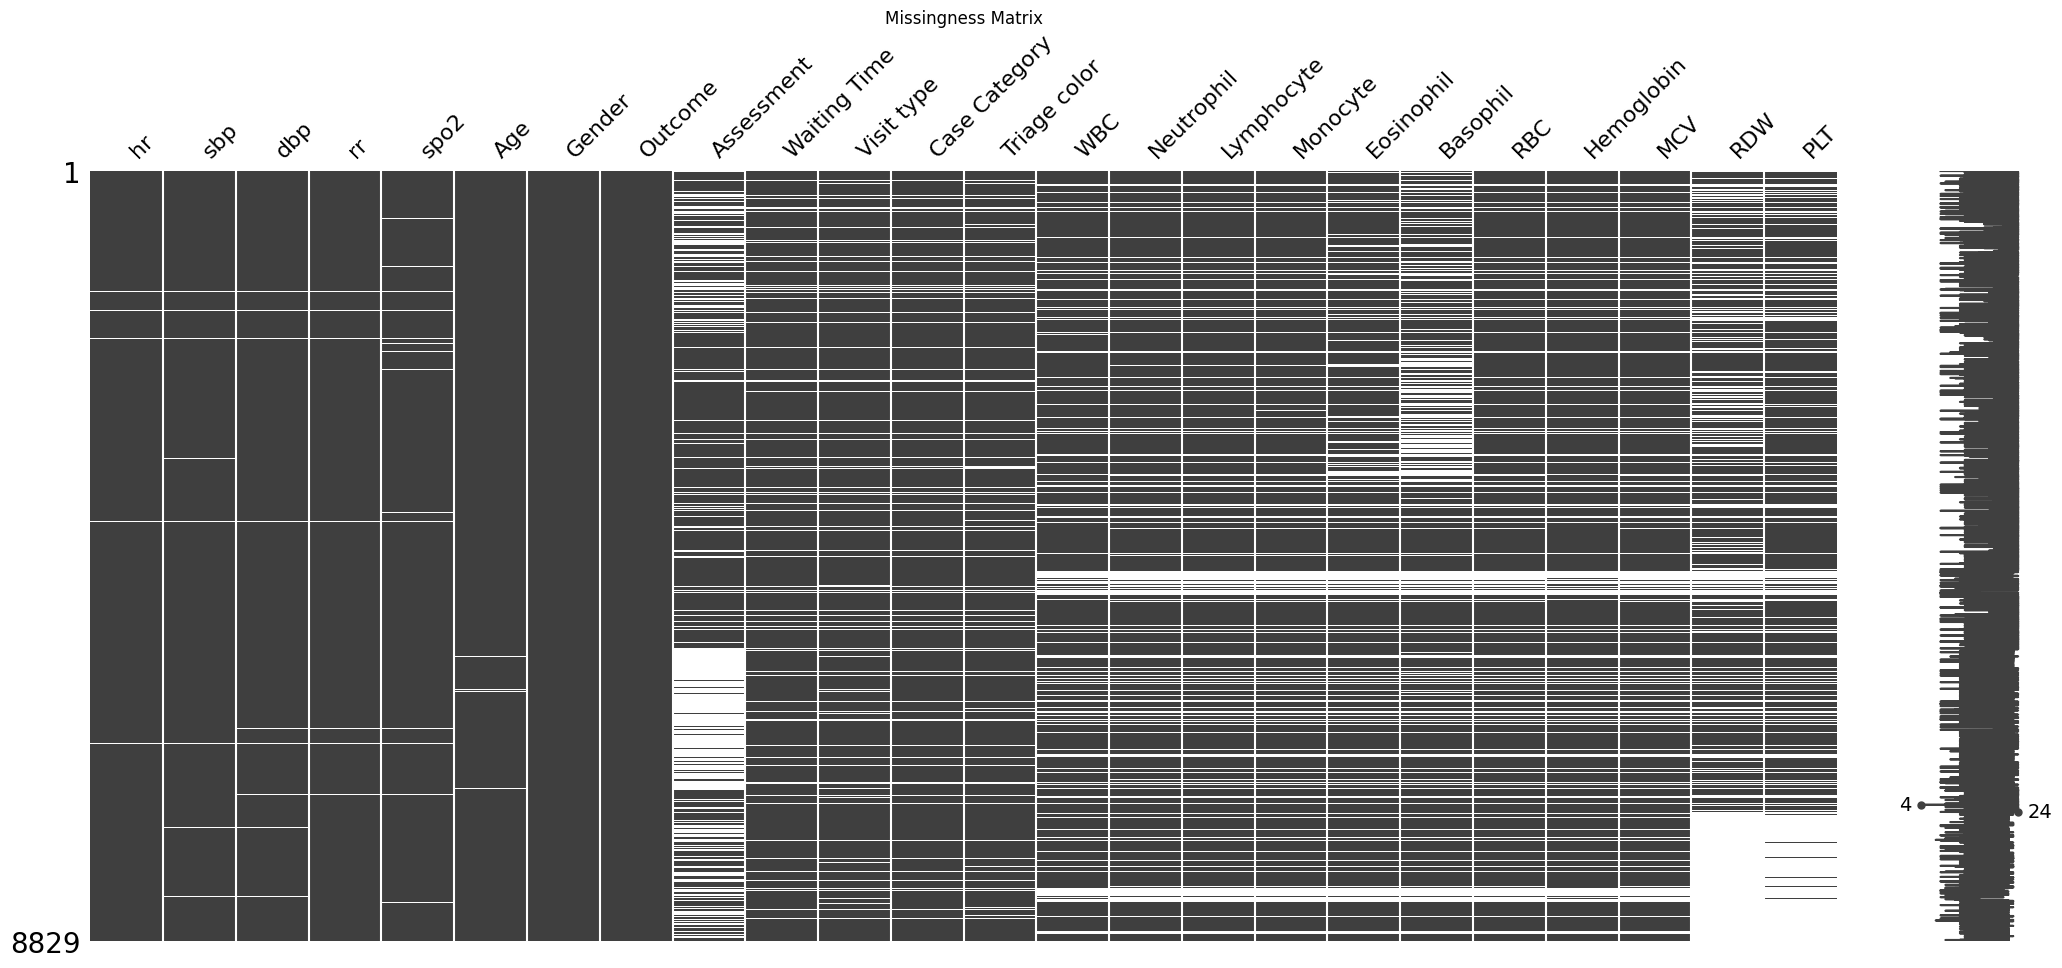

In [19]:
import missingno as msno

# Matrix plot
msno.matrix(Mydf3)
plt.title('Missingness Matrix')
plt.show()


**Imputing ordinal_categories**

In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge

def impute_ordinal_features(df, ordinal_categories):

    ordinal_vars = list(ordinal_categories.keys())
    X_ordinal = df[ordinal_vars].copy()

    # Create a placeholder for missing values that the encoder will recognize
    missing_placeholder = "___MISSING___"
    for col in ordinal_vars:
        X_ordinal[col] = X_ordinal[col].fillna(missing_placeholder)

    # Prepare categories for the encoder, including the placeholder
    # The placeholder should come first so its encoded value is 0
    encoder_categories = []
    for col in ordinal_vars:
        cats = [missing_placeholder] + ordinal_categories[col]
        encoder_categories.append(cats)

    encoder = OrdinalEncoder(categories=encoder_categories, handle_unknown='error') # handle_unknown='error' is default, can keep

    # Encode the data. Missing values are now encoded as 0.
    X_encoded = encoder.fit_transform(X_ordinal)

    # Replace the encoded missing value (0) with np.nan for the imputer
    X_encoded[X_encoded == 0] = np.nan

    # Determine min/max values for the imputer based on the *original* categories
    # The imputed values should fall within the range of the original categories (encoded 1 to max_val)
    min_val_imputer = 1 # Because 0 is the missing placeholder
    max_val_imputer = max(len(cats) for cats in ordinal_categories.values())

    # MICE Imputation (Using BayesianRidge as in the original intention)
    imputer = IterativeImputer(
        estimator=BayesianRidge(), # Or RandomForestRegressor if preferred
        max_iter=20,
        random_state=42,
        min_value=min_val_imputer, # Ensure imputed values are not the missing placeholder value
        max_value=max_val_imputer
    )
    X_imputed = imputer.fit_transform(X_encoded)

    # Post-processing: Round and clip imputed values
    # Ensure values are within the range of *original* category encodings (1 to max_val_imputer)
    X_imputed_rounded = np.round(X_imputed).astype(int)
    X_imputed_clipped = np.clip(X_imputed_rounded, min_val_imputer, max_val_imputer)


    # Decode back to original categories
    # Need to temporarily add the missing placeholder's encoded value (0) back for inverse_transform
    X_decoded_temp = X_imputed_clipped.copy()

    df_imputed = pd.DataFrame(
        encoder.inverse_transform(X_decoded_temp),
        columns=ordinal_vars,
        index=df.index
    )

    # Remove the placeholder string if any somehow remain (shouldn't with clipping)
    for col in ordinal_vars:
         df_imputed[col] = df_imputed[col].replace(missing_placeholder, np.nan) # Should be all imputed now

    return df_imputed

# Usage (rest of the code remains the same)
ordinal_categories = {
    'Triage color': ['green', 'yellow', 'orange', 'red', 'black']
}

# Create copy for safety
Mydf3_imputed = Mydf3.copy()

# Impute and merge
# The function now returns a DataFrame with ONLY the imputed ordinal columns
ordinal_imputed = impute_ordinal_features(Mydf3, ordinal_categories)

# Update the original DataFrame with the imputed columns
for col in ordinal_imputed.columns:
    Mydf3_imputed[col] = ordinal_imputed[col]

# Verification
# Check only the ordinal columns for NaNs
assert not Mydf3_imputed[list(ordinal_categories.keys())].isna().any().any(), \
       f"NaNs remain in: {Mydf3_imputed.columns[Mydf3_imputed.isna().any()].tolist()}"
print("Missing values after imputation:")
print(Mydf3_imputed[list(ordinal_categories.keys())].isna().sum())

Missing values after imputation:
Triage color    0
dtype: int64


In [ ]:
Mydf3_imputed.shape

(8829, 24)

A modular processing approach was adopted to mitigate potential data loss during long-running computations. This allowed the process to be restarted from saved intermediate states rather than from the initial raw dataset.

In [ ]:
from google.colab import files
Mydf3_imputed.to_excel('Mydf3_imputed.xlsx', index=True)
files.download('Mydf3_imputed.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Due to memory constraints, the dataset (Mydf3) was partitioned into ten equal subsets for processing. Following the imputation phase, these subsets were re-integrated into a single consolidated dataset (Mydf4) for the nex steps.

In [ ]:
split_dfs = np.array_split(Mydf3_imputed, 10)

# Verify equal splits and assign to named parts
for i, df_part in enumerate(split_dfs):
    globals()[f'part_{i+1}'] = df_part
    print(f"Part {i+1} shape: {df_part.shape}")

Part 1 shape: (883, 24)
Part 2 shape: (883, 24)
Part 3 shape: (883, 24)
Part 4 shape: (883, 24)
Part 5 shape: (883, 24)
Part 6 shape: (883, 24)
Part 7 shape: (883, 24)
Part 8 shape: (883, 24)
Part 9 shape: (883, 24)
Part 10 shape: (882, 24)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
part_1.head()

,hr,sbp,dbp,rr,spo2,Age,Gender,Outcome,Assessment,Waiting Time,...,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Hemoglobin,MCV,RDW,PLT
0,66.0,115.0,69.0,20.0,95.0,65.0,Female,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,90.0,70.0,22.0,93.0,33.0,Male,0,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111.0,142.0,78.0,22.0,81.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,3.0,...,88.4,3.7,5.9,2.0,NaN,5.72,15.6,90.8,13.9,392.0
5,90.0,120.0,70.0,26.0,95.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,...,88.4,3.7,5.9,2.0,NaN,5.72,15.6,90.8,13.9,392.0
6,110.0,100.0,60.0,55.0,70.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,...,88.4,3.7,5.9,2.0,NaN,5.72,15.6,90.8,13.9,392.0


**Imputing numerical data**

In [ ]:

from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_1[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']


# Perform imputation
X_continuous_imputed = robust_imputation(part_1, continuous_vars)

# Merge back
part_1[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_1[continuous_vars].isna().sum())
assert part_1[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 19.78
[IterativeImputer] Change: 0.0, scaled tolerance: 0.014299923145886377 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_2[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_2, continuous_vars)

# Merge back
part_2[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_2[continuous_vars].isna().sum())
assert part_2[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 23.07
[IterativeImputer] Change: 0.0, scaled tolerance: 0.012531009819160777 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_3[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_3, continuous_vars)

# Merge back
part_3[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_3[continuous_vars].isna().sum())
assert part_3[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 19.31
[IterativeImputer] Change: 0.0, scaled tolerance: 0.008831957171832043 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_4[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_4, continuous_vars)

# Merge back
part_4[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_4[continuous_vars].isna().sum())
assert part_4[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 20.66
[IterativeImputer] Change: 0.0, scaled tolerance: 0.01306649625315482 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_5[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_5, continuous_vars)

# Merge back
part_5[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_5[continuous_vars].isna().sum())
assert part_5[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 20.44
[IterativeImputer] Change: 0.0, scaled tolerance: 0.01336207770996147 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_6[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_6, continuous_vars)

# Merge back
part_6[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_6[continuous_vars].isna().sum())
assert part_6[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 20.45
[IterativeImputer] Change: 0.0, scaled tolerance: 0.015164545070203221 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_7[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_7, continuous_vars)

# Merge back
part_7[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_7[continuous_vars].isna().sum())
assert part_7[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 21.51
[IterativeImputer] Change: 0.0, scaled tolerance: 0.015136511570044756 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_8[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_8, continuous_vars)

# Merge back
part_8[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_8[continuous_vars].isna().sum())
assert part_8[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 20.41
[IterativeImputer] Change: 0.0, scaled tolerance: 0.013214862454010243 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars):
    """
    Robust imputation pipeline that guarantees no missing values remain
    """
    # 1. Extract continuous variables
    X_continuous = part_9[continuous_vars].copy()

    # 2. Initial simple imputation for complete matrix (required for scaling)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)

    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs
    for col in continuous_vars:
        # First try column median
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

        # If still NaN (unlikely but possible), use global median
        if X_continuous_imputed[col].isna().any():
            global_median = X_continuous_imputed.median().median()
            X_continuous_imputed[col].fillna(global_median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation
X_continuous_imputed = robust_imputation(part_9, continuous_vars)

# Merge back
part_9[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_9[continuous_vars].isna().sum())
assert part_9[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

[IterativeImputer] Completing matrix with shape (883, 18)
[IterativeImputer] Ending imputation round 1/50, elapsed time 18.95
[IterativeImputer] Change: 0.0, scaled tolerance: 0.01509571383528616 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


In [ ]:

def robust_imputation(data, continuous_vars, reference_data=None):
    """
    Robust imputation pipeline that guarantees no missing values remain
    and handles columns with all NaNs by using a reference DataFrame's median.
    """
    # 1. Extract continuous variables
    X_continuous = part_10[continuous_vars].copy()

    # Check for columns with all missing values in the current data part
    all_nan_cols = X_continuous.columns[X_continuous.isnull().all()].tolist()

    if all_nan_cols and reference_data is not None:
        print(f"Handling columns with all missing values in current data part: {all_nan_cols}")
        # Impute columns with all missing values using median from the reference_data
        for col in all_nan_cols:
            if col in reference_data.columns:
                 # Use a simple median imputer for these columns based on reference data
                median_value = reference_data[col].median()
                X_continuous[col].fillna(median_value, inplace=True)
                print(f"  Imputed '{col}' with median from reference data.")
            else:
                print(f"  Warning: Column '{col}' not found in reference data. Cannot impute.")


    # 2. Initial simple imputation for complete matrix (required for scaling) on the partially imputed data
    # This will handle any remaining NaNs (those not in all_nan_cols)
    initial_imputer = SimpleImputer(strategy='median')
    X_init_imputed = initial_imputer.fit_transform(X_continuous)


    # 3. Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_init_imputed)

    # 4. Iterative Imputation (MICE with RandomForest)
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100, random_state=42),
        max_iter=50,  # Increased iterations
        tol=1e-3,    # Added tolerance for early stopping
        random_state=42,
        verbose=2,
        min_value=-3,  # Constrain to reasonable scaled values
        max_value=3
    )

    try:
        X_imputed_scaled = imputer.fit_transform(X_scaled)
    except:
        # Fallback to KNN if MICE fails
        from sklearn.impute import KNNImputer
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed_scaled = knn_imputer.fit_transform(X_scaled)

    # 5. Inverse scaling
    X_imputed = scaler.inverse_transform(X_imputed_scaled)
    X_continuous_imputed = pd.DataFrame(X_imputed,
                                      columns=continuous_vars,
                                      index=data.index)

    # 6. Multi-layer fallback for any remaining NaNs (should not happen with the above steps)
    for col in continuous_vars:
        if X_continuous_imputed[col].isna().any():
            median = X_continuous_imputed[col].median()
            X_continuous_imputed[col].fillna(median, inplace=True)

    # 7. Final validation
    if X_continuous_imputed.isna().sum().sum() > 0:
        raise ValueError("Critical error: NaN values still exist after all imputation attempts")

    return X_continuous_imputed

# Define continuous variables
continuous_vars = ['Age', 'Waiting Time', 'rr', 'hr', 'sbp', 'dbp', 'spo2',
                 'WBC', 'Neutrophil','Lymphocyte', 'Monocyte', 'Eosinophil','Basophil',
                 'RBC', 'Hemoglobin', 'MCV','RDW', 'PLT']

# Perform imputation, passing part_9 as reference data for columns with all NaNs in part_10
X_continuous_imputed = robust_imputation(part_10, continuous_vars, reference_data=part_9)

# Merge back
part_10[continuous_vars] = X_continuous_imputed

# Final check
print("Missing values after imputation:\n", part_10[continuous_vars].isna().sum())
assert part_10[continuous_vars].isna().sum().sum() == 0, "There are still missing values!"

Handling columns with all missing values in current data part: ['RDW']
  Imputed 'RDW' with median from reference data.
[IterativeImputer] Completing matrix with shape (882, 18)


/tmp/ipython-input-100267107.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_continuous[col].fillna(median_value, inplace=True)


[IterativeImputer] Ending imputation round 1/50, elapsed time 15.30
[IterativeImputer] Change: 0.0, scaled tolerance: 0.012181133850722198 
[IterativeImputer] Early stopping criterion reached.
Missing values after imputation:
 Age             0
Waiting Time    0
rr              0
hr              0
sbp             0
dbp             0
spo2            0
WBC             0
Neutrophil      0
Lymphocyte      0
Monocyte        0
Eosinophil      0
Basophil        0
RBC             0
Hemoglobin      0
MCV             0
RDW             0
PLT             0
dtype: int64


**Imputing nominal variables**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_1[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
# handle_unknown='ignore' is already good for unseen categories during transform
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    # Change estimator to RandomForestClassifier
    estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    max_iter=20,
    random_state=42,
    # Add initial strategy to handle potential all-NaN columns in the split
    initial_strategy='most_frequent'
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
# Need to ensure the imputed values are valid before inverse transform
# The imputed values from IterativeImputer are floats, need to round and convert to int
X_nominal_imputed_encoded_rounded = np.round(X_nominal_imputed_encoded).astype(int)

# Ensure imputed values correspond to valid one-hot encoded vectors
# This is a safety step, IterativeImputer with classification estimator should produce valid results
# Find the indices of the maximum value in each row (corresponding to the predicted class)
predicted_class_indices = np.argmax(X_nominal_imputed_encoded_rounded, axis=1)

# Create a new one-hot encoded array based on the predicted class indices
# This ensures the output is strictly one-hot encoded
X_nominal_imputed_onehot = np.zeros_like(X_nominal_imputed_encoded_rounded)
X_nominal_imputed_onehot[np.arange(len(predicted_class_indices)), predicted_class_indices] = 1


imputed_categories = encoder.inverse_transform(X_nominal_imputed_onehot)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_1.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (should not happen with IterativeImputer)
# This step is likely not needed with IterativeImputer but kept as a safeguard
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        # If somehow NaNs remain, sample from non-missing values in the imputed column
        valid_values = X_nominal_imputed[col].dropna().unique()
        if len(valid_values) > 0:
            X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
                valid_values,
                size=nan_mask.sum()
            )
        else:
             # If all values in the imputed column are NaN (highly unlikely), sample from original data if possible
             original_valid_values = part_1[col].dropna().unique()
             if len(original_valid_values) > 0:
                 X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
                     original_valid_values,
                     size=nan_mask.sum()
                 )
             else:
                 # As a last resort, assign a placeholder or raise an error
                 X_nominal_imputed.loc[nan_mask, col] = 'Unknown' # Or some other placeholder
                 print(f"Warning: Column '{col}' had no valid values to sample from. Assigned 'Unknown'.")


# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    # Only update where the original value was NaN
    part_1[col] = part_1[col].where(~part_1[col].isna(), X_nominal_imputed[col])

# Verification
assert part_1[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_1[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:

# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_2[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_2.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_2[col] = part_2[col].where(~part_2[col].isna(), X_nominal_imputed[col])

# Verification
assert part_2[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_2[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_3[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_3.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_3[col] = part_3[col].where(~part_3[col].isna(), X_nominal_imputed[col])

# Verification
assert part_3[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_3[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_4[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_4.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_4[col] = part_4[col].where(~part_4[col].isna(), X_nominal_imputed[col])

# Verification
assert part_4[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_4[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_5[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_5.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_5[col] = part_5[col].where(~part_5[col].isna(), X_nominal_imputed[col])

# Verification
assert part_5[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_5[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_6[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_6.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_6[col] = part_6[col].where(~part_6[col].isna(), X_nominal_imputed[col])

# Verification
assert part_6[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_6[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_7[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_7.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_7[col] = part_7[col].where(~part_7[col].isna(), X_nominal_imputed[col])

# Verification
assert part_7[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_7[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:

# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_8[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_8.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_8[col] = part_8[col].where(~part_8[col].isna(), X_nominal_imputed[col])

# Verification
assert part_8[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_8[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_9[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_9.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_9[col] = part_9[col].where(~part_9[col].isna(), X_nominal_imputed[col])

# Verification
assert part_9[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_9[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:


# Nominal columns to impute
nominal_vars = ['Gender', 'Visit type', 'Case Category']
X_nominal = part_10[nominal_vars].copy()

# Step 1: One-hot encode nominal variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_nominal_encoded = encoder.fit_transform(X_nominal)

# Step 2: MICE Imputation
mice_imputer = IterativeImputer(
    estimator=LogisticRegression(max_iter=1000),
    max_iter=20,
    random_state=42
)
X_nominal_imputed_encoded = mice_imputer.fit_transform(X_nominal_encoded)

# Step 3: Convert back to categories
imputed_categories = encoder.inverse_transform(X_nominal_imputed_encoded)
X_nominal_imputed = pd.DataFrame(imputed_categories, columns=nominal_vars, index=part_10.index)

# Step 4: Fallback - Random Sampling for Residual NaNs (if any)
for col in nominal_vars:
    nan_mask = X_nominal_imputed[col].isna()
    if nan_mask.any():
        X_nominal_imputed.loc[nan_mask, col] = np.random.choice(
            X_nominal_imputed[col].dropna(),
            size=nan_mask.sum()
        )

# Step 5: Merge imputed values back into original DataFrame
for col in nominal_vars:
    part_10[col] = part_10[col].where(~part_10[col].isna(), X_nominal_imputed[col])

# Verification
assert part_10[nominal_vars].isna().sum().sum() == 0, "NaNs still exist!"
print("Missing values after imputation:", part_10[nominal_vars].isna().sum())

Missing values after imputation: Gender           0
Visit type       0
Case Category    0
dtype: int64


In [ ]:
# Mydf3 = pd.read_parquet('temp_processed.parquet')

In [ ]:
# Merge all split parts back together
Mydf4 = pd.concat([part_1, part_2, part_3, part_4, part_5, part_6, part_7, part_8, part_9, part_10], axis=0)
# Verify equality with the original DataFrame
print(f"Merged DataFrame shape: {Mydf4.shape}")
print(f"Original DataFrame shape: {Mydf3_imputed.shape}")
#print("\nAre they identical?", Mydf4.equals(Mydf3))


Merged DataFrame shape: (8829, 24)
Original DataFrame shape: (8829, 24)


In [ ]:
Mydf4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 0 to 12438
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hr             8829 non-null   float64
 1   sbp            8829 non-null   float64
 2   dbp            8829 non-null   float64
 3   rr             8829 non-null   float64
 4   spo2           8829 non-null   float64
 5   Age            8829 non-null   float64
 6   Gender         8829 non-null   object 
 7   Outcome        8829 non-null   int64  
 8   Assessment     5678 non-null   object 
 9   Waiting Time   8829 non-null   float64
 10  Visit type     8829 non-null   object 
 11  Case Category  8829 non-null   object 
 12  Triage color   8829 non-null   object 
 13  WBC            8829 non-null   float64
 14  Neutrophil     8829 non-null   float64
 15  Lymphocyte     8829 non-null   float64
 16  Monocyte       8829 non-null   float64
 17  Eosinophil     8829 non-null   float64
 18  Basophil    

In [ ]:
print("\nMissing values after imputation:")
print(Mydf4.isna().sum())


Missing values after imputation:
hr                  0
sbp                 0
dbp                 0
rr                  0
spo2                0
Age                 0
Gender              0
Outcome             0
Assessment       3151
Waiting Time        0
Visit type          0
Case Category       0
Triage color        0
WBC                 0
Neutrophil          0
Lymphocyte          0
Monocyte            0
Eosinophil          0
Basophil            0
RBC                 0
Hemoglobin          0
MCV                 0
RDW                 0
PLT                 0
dtype: int64


In [ ]:
from google.colab import files
Mydf4.to_excel('Mydf1st4.xlsx', index=True)
files.download('Mydf1st4.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_path20 =  "/content/drive/MyDrive/Mydf1st4(4).xlsx"

This allowed the process to be restarted from saved intermediate states rather than from the initial raw dataset.

In [ ]:
Mydf33 =Mydf4
# Mydf33 = pd.read_excel(file_path20) ----> USE this one if there is interaption.

# Feature Engeenering

In [ ]:

# Create new features
Mydf33['MAP'] = Mydf33['dbp'] + (1/3) * (Mydf33['sbp'] - Mydf33['dbp'])

Mydf33['SIRI'] = (Mydf33['Neutrophil'] * Mydf33['Monocyte']) / Mydf33['Lymphocyte']

Mydf33['Oxygen Delivery Index'] = Mydf33['Hemoglobin'] * Mydf33['spo2']

print(Mydf33)


          hr    sbp   dbp    rr  spo2   Age  Gender  Outcome  \
0       66.0  115.0  69.0  20.0  95.0  65.0  Female        0   
1      136.0   90.0  70.0  22.0  93.0  33.0    Male        0   
4      111.0  142.0  78.0  22.0  81.0  50.0    Male        0   
5       90.0  120.0  70.0  26.0  95.0  50.0    Male        0   
6      110.0  100.0  60.0  55.0  70.0  50.0    Male        0   
...      ...    ...   ...   ...   ...   ...     ...      ...   
12431  120.0  153.0  71.0  40.0  96.0  55.0  Female        0   
12433   88.0  132.0  71.0  20.0  93.0  80.0  Female        0   
12435  112.0  103.0  82.0  20.0  94.0  20.0  Female        0   
12436   89.0  100.0  60.0  20.0  92.0  22.0    Male        0   
12438  116.0   77.0  50.0  42.0  97.0  60.0  Female        0   

                                              Assessment  Waiting Time  ...  \
0                                                    NaN           3.0  ...   
1                                                    NaN          12.0  .

In [ ]:
Mydf33 = Mydf33.drop(['sbp', 'dbp', 'Neutrophil', 'Monocyte', 'Lymphocyte', 'Hemoglobin', 'spo2'], axis=True)

print(Mydf33)

          hr    rr   Age  Gender  Outcome  \
0       66.0  20.0  65.0  Female        0   
1      136.0  22.0  33.0    Male        0   
4      111.0  22.0  50.0    Male        0   
5       90.0  26.0  50.0    Male        0   
6      110.0  55.0  50.0    Male        0   
...      ...   ...   ...     ...      ...   
12431  120.0  40.0  55.0  Female        0   
12433   88.0  20.0  80.0  Female        0   
12435  112.0  20.0  20.0  Female        0   
12436   89.0  20.0  22.0    Male        0   
12438  116.0  42.0  60.0  Female        0   

                                              Assessment  Waiting Time  \
0                                                    NaN           3.0   
1                                                    NaN          12.0   
4      Acute exacerbation of Bronchial asthma ppted by ?           3.0   
5      Acute exacerbation of Bronchial asthma ppted by ?           2.0   
6      Acute exacerbation of Bronchial asthma ppted by ?           2.0   
...            

In [ ]:
#print(sorted(Mydf4['SIRI'].unique()))

In [ ]:
Mydf33.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 0 to 12438
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hr                     8829 non-null   float64
 1   rr                     8829 non-null   float64
 2   Age                    8829 non-null   float64
 3   Gender                 8829 non-null   object 
 4   Outcome                8829 non-null   int64  
 5   Assessment             5678 non-null   object 
 6   Waiting Time           8829 non-null   float64
 7   Visit type             8829 non-null   object 
 8   Case Category          8829 non-null   object 
 9   Triage color           8829 non-null   object 
 10  WBC                    8829 non-null   float64
 11  Eosinophil             8829 non-null   float64
 12  Basophil               8829 non-null   float64
 13  RBC                    8829 non-null   float64
 14  MCV                    8829 non-null   float64
 15  RDW     

# Text Mining

In [ ]:
import nltk

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 8.4 MB/s eta 0:00:00


In [ ]:
from docx import Document

# Load the .docx file
doc = Document("/content/drive/MyDrive/typo.docx")

# Extract text from paragraphs
text_content = []
for paragraph in doc.paragraphs:
    text_content.append(paragraph.text)

# Create a DataFrame from the extracted text
Data8 = pd.DataFrame({'text': text_content})

# Display the first few rows of the DataFrame
display(Data8.head())

,text
0,aappendicitis → appendicitis
1,abcess → abscess
2,abcessca → abscess
3,abcsecces → abscesses
4,abdmen → abdomen


In [ ]:
# Create a new typo_corrections dictionary from Data8
typo_corrections2 = {}

# Ensure Data8 is loaded and has a 'text' column
if 'Data8' in locals() and isinstance(Data8, pd.DataFrame) and 'text' in Data8.columns:
    # Iterate through rows and populate the new dictionary
    for index, row in Data8.iterrows():
        # The text column contains both the typo and the correction separated by '→'
        text_entry = str(row['text']).strip()

        # Split the text entry by '→'
        parts = text_entry.split('→')

        if len(parts) == 2:
            # If '→' is present, the first part is the typo and the second is the correction
            typo = parts[0].strip()
            correction = parts[1].strip()
            if typo and correction and typo != 'nan' and correction != 'nan':
                typo_corrections2[typo] = correction
        # If there's no '→', this entry might not be in the "typo -> correction" format, so we skip it.


print(f"Created new typo_corrections dictionary with {len(typo_corrections2)} entries from Data8.")

# Display a few entries to verify
# print({k: typo_corrections[k] for k in list(typo_corrections)[:10]})

Created new typo_corrections dictionary with 212 entries from Data8.


In [ ]:
# Redefine the initial typo_corrections dictionary (with 106 entries)
initial_typo_corrections1 = {
    '#': 'fracture',
    'aa': 'acute abdomen',
    'abdomeen': 'abdomen',
    'abdomil': 'abdominal',
    'abdomil pain': 'abdominal pain',
    'abdomenal': 'abdominal',
    'abm': 'abnormal body movement',
    'acidbase': 'acid-base',
    'acs': 'acute coronary syndrome',
    'afib': 'atrial fibrillation',
    'age': 'acute gastroenteritis',
    'afi': 'acute febrile illness',
    'aki': 'acute kidney injury',
    'allergy': 'allergy',
    'amlodipine': 'amlodipine',
    'anaemia': 'anemia',
    "asthmatics":'asthma',
    'aur': 'acute urinary retention',
    'awd': 'acute watery diarrhea',
    'bph': 'benign prostatic hyperplasia',
    'ca': 'cancer',
    'cap': 'community-acquired pneumonia',
    'cf': 'cystic fibrosis',
    'chf': 'congestive heart failure',
    'chemo': 'chemotherapy',
    'cholecystitis': 'cholecystitis',
    'cholethiasis': 'cholelithiasis',
    'cholithiasis': 'cholelithiasis',
    'cholothiasis': 'cholelithiasis',
    'ckd': 'chronic kidney disease',
    'cld': 'chronic liver disease',
    'conciousness': 'consciousness',
    'copd': 'chronic obstructive pulmonary disease',
    'c section': 'cesarean section',
    'cva': 'cerebrovascular accident',
    'dawn': 'down',
    'diarhea': 'diarrhea',
    'diarrhea': 'diarrhea',
    'diarrheas': 'diarrhea',
    'diarrheoa': 'diarrhea',
    'diarrhoea': 'diarrhea',
    'diharrea': 'diarrhea',
    'dka': 'diabetic ketoacidosis',
    'dm': 'diabetes mellitus',
    'dvt': 'deep vein thrombosis',
    'epilepsy': 'epileptic',
    'epitaxisis': 'epistaxis',
    'epliptic': 'epileptic',
    'esrd': 'end-stage renal disease',
    'falciparum': 'P. falciparum',
    'figthing': 'fighting',
    'fithing': 'fighting',
    'gbs': 'guillain barre syndrome',
    'gi': 'gastrointestinal',
    'gu': 'genitourinary',
    'haemorrhage': 'hemorrhage',
    'haemorrhagic': 'hemorrhagic',
    'hemiparasis': 'hemiparesis',
    'hemiplegia': 'hemiparesis',
    'hemorhagic': 'hemorrhagic',
    'hemoroide':'hemorrhoids',
    'hemorrogic': 'hemorrhagic',
    'hhs': 'hyperosmolar hyperglycemic state',
    'hiv': 'human immunodeficiency virus',
    'hpt': 'hypertension',
    'htn': 'hypertension',
    'hypoglycaemia': 'hypoglycemia',
    'hypokalaemia': 'hypokalemia',
    'ibd': 'inflammatory bowel disease',
    'id': 'infectious disease',
    'illiness': 'illness',
    'ilness': 'illness',
    'infectious': 'infection',
    'lgib': 'lower gastrointestinal bleeding',
    'loc': 'loss of consciousness',
    'lbo': 'large bowel obstruction',
    'lrri': 'lower respiratory tract infection',
    'mi': 'myocardial infarction',
    'pansaithopinea': 'pancytopenia',
    'pe': 'pulmonary embolism',
    'pid': 'pelvic inflammatory disease',
    'pnemonia': 'pneumonia',
    'pnumonia': 'pneumonia',
    'preg': 'pregnancy',
    'pregcy': 'pregnancy',
    'ptb': 'pulmonary tuberculosis',
    'pud': 'peptic ulcer disease',
    'pyelo': 'pyelonephritis',
    'raptured': 'ruptured',
    'rf': 'relapsing fever',
    'rta': 'road traffic accident',
    'rvi': 'respiratory viral infection',
    'sbo': 'small bowel obstruction',
    'sever': 'severe',
    'sevsr': 'severe',
    'sob': 'shortness of breath',
    'ssi': 'surgical site infection',
    'std': 'sexually transmitted disease',
    'tb': 'tuberculosis',
    'tbi': 'traumatic brain injury',
    'tia': 'transient ischemic attack',
    'tonicclonic': 'tonic-clonic',
    'truama': 'trauma',
    'ugib': 'upper gastrointestinal bleeding',
    'uriry': 'urinary',
    'urti': 'upper respiratory tract infection',
    'uti': 'urinary tract infection',
    'vaginal delivery': 'vaginal delivery',
    'vivax': 'P. vivax',
    'wheezimng': 'wheezing'
}


# Create a copy of the initial dictionary
merged_typo_corrections = initial_typo_corrections1.copy()

# Add entries from the new dictionary (from Data8).
# If there are duplicate keys, the entry from the new dictionary will overwrite the old one.
merged_typo_corrections.update(typo_corrections2)


print(f"Created a merged typo_corrections dictionary with {len(merged_typo_corrections)} entries.")

# Display a few entries to verify
print({k: merged_typo_corrections[k] for k in list(merged_typo_corrections)[:20]})

Created a merged typo_corrections dictionary with 322 entries.
{'#': 'fracture', 'aa': 'acute abdomen', 'abdomeen': 'abdomen', 'abdomil': 'abdominal', 'abdomil pain': 'abdominal pain', 'abdomenal': 'abdominal', 'abm': 'abnormal body movement', 'acidbase': 'acid-base', 'acs': 'acute coronary syndrome', 'afib': 'atrial fibrillation', 'age': 'acute gastroenteritis', 'afi': 'acute febrile illness', 'aki': 'acute kidney injury', 'allergy': 'allergy', 'amlodipine': 'amlodipine', 'anaemia': 'anemia', 'asthmatics': 'asthma', 'aur': 'acute urinary retention', 'awd': 'acute watery diarrhea', 'bph': 'benign prostatic hyperplasia'}


In [ ]:
# Assign the merged dictionary to the typo_corrections variable
typo_corrections = merged_typo_corrections

print("typo_corrections variable updated with the merged dictionary.")
print(f"Number of entries in typo_corrections: {len(typo_corrections)}")

typo_corrections variable updated with the merged dictionary.
Number of entries in typo_corrections: 322


In [ ]:

medical_categories = {
    "Autoimmune": [
        "autoimmune hepatitis",
        "inflammatory bowel disease",
        "lupus",
        "rheumatoid arthritis",
        "allergy",
    ],
    "Cardiovascular": [
        "acute coronary",
        "angina",
        "arrhythmia",
        "atrial fibrillation",
        "bradycardia",
        "cardiac",
        "cardiac disease",
        "cardiac problem",
        "cardiogenic shock",
        "cardiomyopathy",
        "cerebrovascular accident",
        "cva",
        "chf",
        "dvt",
        "heart failure",
        "heart failure",
        "hemorrhage",
        "hemorrhagic",
        "htn",
        "hypertension",
        "hypertensive",
        "hypertensive urgency",
        "hypovolemia",
        "hypovolemic",
        "myocardial infarction",
        "shock",
        "syncope",
        "thromboembolism",
        "vein thrombosis"
    ],
    "Dermatologic": [
        "dermatitis",
        "gangrene",
        "gangrenous",
        "hidradenitis",
        "neurodermatitis",
        "skin abrasion",
        "urticaria"
    ],
    "Endocrine": [
        "thyroid disorder",
        "goiter",
        "hyperthyroidism",
        "hypothyroidism",
    ],
    "Gastrointestinal": [
        "abdominal pain",
        "abdomil cramp",
        "acute abdomen",
        "acute gastroenteritis",
        "acute watery diarrhea",
        "appendicitis",
        "ascites",
        "bowel obstruction",
        "calculi",
        "cholangitis",
        "cholecystitis",
        "cholecystitis cholangitis",
        "choledocholithiasis",
        "liver disease",
        "cirrhosis",
        "constipation",
        "diarrhea",
        "diverticulitis",
        "dysentery",
        "dyspepsia",
        "cbd",
        "gastritis",
        "gastrointestinal",
        "gastrointestinal bleeding",
        "hemorrhoids",
        "hepatic",
        "hepatitis",
        "hernia",
        "intestinal",
        "bowel obstruction",
        "gastrointestinal bleeding",
        "pancreatitis",
        "peptic ulcer",
        "perforated",
        "peritonitis",
        'obstruction',
        "bacterial peritonitis",
        "ugib",
        "pud",
        "lgib",
        "volvulus"
    ],
    "Hematologic": [
        "anemia",
        "bicytopenia",
        "epistaxis",
        "hemophilia",
        "pancytopenia",
        "s.anemia",
        "thrombocytopenia",
    ],
    "Infectious": [
        "aids",
        "afi",
        "abscess",
        "abscess strangulated",
        "age",
        "agi",
        "abscesses",
        "febrile illness",
        "amoeba",
        "bacterial",
        "bronchitis",
        "cap",
        "cellulitis",
        "chlamydia",
        "cholera",
        "covid",
        "cystic fibrosis",
        "dengue",
        "epididymitis",
        "epididymo-orchitis",
        "esophageal candidiasis",
        "furunculosis",
        "gastroenteritis",
        "genital warts",
        "gonorrhea",
        "herpes",
        "human immunodeficiency",
        "infection",
        "infectious disease",
        "malaria",
        "mastitis",
        "measles",
        "meningoencephalitis",
        "orchitis",
        "otitis",
        "pelvic inflammatory",
        "phlebitis",
        "P falciparum",
        "P vivax",
        "pneumonia",
        "urti",
        "prostatitis",
        "tuberculosis",
        "relapsing fever",
        "retroviral infection",
        "rvi",
        "sexually transmitted",
        "sebcis",
        "scap",
        "sialadenitis",
        "site infection",
        "syphilis",
        "tetanus",
        "tonsillitis",
        "tonsillopharyngitis",
        "tuberculosis",
        "typhoid",
        "tract infection",
        "uti",
        "viral infection"
    ],
    "Metabolic": [
        "acidosis",
        "dehydration",
        "diabetes",
        "diabetes mellitus",
        "diabetes_mellitus",
        "diabetic",
        "diabetic ketoacidosis",
        "dka",
        "dm",
        "hhs",
        "hyperosmolar hyperglycemic",
        "hypoglycemia",
        "dyslipidemia",
        "electrolyte imbalance",
        "hypocalcemia",
        "hypoglycemia",
        "hypokalemia",
        "hyponatremia",
    ],
    "Musculoskeletal": [
        "ankylosing arthritis",
        "arthritis",
        "bed sore",
        "bone fracture",
        "bursitis",
        "distal tibial",
        "fracture",
        "herniated disc",
        "hypertensive arthritis",
        "inguinal",
        "malleolar",
        "osteoarthritis",
        "osteomyelitis",
        "paraumbilical",
        "phalangeal",
        "spondylosis",
        "submandibular",
        "umbilical"
    ],
    "Neurological": [
        "abnormal body movement",
        "alzheimer",
        "back pain",
        "body movement",
        "body weakness",
        "cerebral",
        "coma",
        "consciousness",
        "encephalopathy",
        "epidural hematoma",
        "epilepsy",
        "epileptic",
        "tonic-clonic seizures)",
        "gtcs",
        "guillain-barré",
        "hemiplegia",
        "hemiparesis",
        "herniation",
        "intracranial",
        "intoxication",
        "ischemic stroke",
        "meningioma",
        "meningitis",
        "migraine headache",
        "neuropathy",
        "neurologic disease",
        "neurologic disorder",
        "neurodermatitis",
        "paralysis",
        "paraparesis",
        "paraplegia",
        "parkinson",
        "quadriplegia",
        "radiculopathy",
        "seizure",
        "status epilepticus",
        "stroke",
        "subdural hematoma",
        "tonic-clonic",
        "traumatic brain",
        "brain injury",
        "transient ischemic"
    ],
    "Obstetric/Gynecologic": [
        "cesarean section",
        "hydatidiform mole",
        "mastitis",
        "pelvic inflammatory",
        "pregnancy"
    ],
    "Oncologic": [
        "cancer",
        "carcinoma",
        "chemotherapy",
        "cll",
        "immunosuppression",
        "lymphocytic leukemia",
        "leukemia",
        "lymphangitis",
        "lymphoma",
        "malignancy",
        "malignant",
        "meningioma",
        "metastasis",
        "neoplasm",
        "sarcoma",
        "solid_tumor_with_metastasis",
        "tumor"
    ],
    "Renal": [
        "kidney injury",
        "urinary retention",
        "renal failure",
        "aki",
        "arf",
        "prostatic hyperplasia",
        "kidney disease",
        "ckd",
        "renal disease",
        "glomerulonephritis",
        "hydronephrosis",
        "kidney injury",
        "kidney stones",
        "nephritis",
        "nephrolithiasis",
        "nephrosis",
        "nephrotic syndrome",
        "neurogenic bladder",
        "pyelonephritis",
        "renal disease",
        "RPGN",
        "scrotal swelling",
        "uremia",
        "urethral",
        "urinary retention"
    ],
    "Respiratory": [
        "ards",
        "respiratory distress",
        "asthma",
        "aeba",
        "asthmatic",
        "bronchial asthma",
        "bronchiectasis",
        "bronchitis",
        "pulmonary disease",
        "copd",
        "pleural effusion",
        "pneumothorax",
        "pulmonary embolism",
        "pulmonary tuberculosis",
        "respiratoty distress",
        "respiratory disease",
        "wheezing"
    ],
    "Toxicologic": [
        "drug overdose",
        "poisoning",
        "toxicity"
    ],
    "Trauma": [
        "blunt",
        "bone fracture",
        "burn",
        "contusion",
        "crushing",
        "dislocation",
        "fall",
        "falling down",
        "fighting",
        "fighting injury",
        "fracture",
        "gunshot wound",
        "hemothorax",
        "injury",
        "laceration",
        "malleolar",
        "pierced",
        "puncture",
        "traffic accident",
        "rta",
        "ruptured",
        "skin abrasion",
        "stab injury",
        "trauma",
        "traumatic",
        "wound"
    ]
}


In [ ]:
from nltk import word_tokenize, ngrams

def extract_ngrams(tokens, n=2):
    return [" ".join(gram) for gram in ngrams(tokens, n)]

In [ ]:
import re
from nltk import word_tokenize, ngrams

def preprocess_text2(text):
    # Step 1: Add spaces around commas to separate attached words
    text = re.sub(r',', ' , ', str(text))  # Force string conversion + comma handling

    # Step 2: Replace specific characters with spaces
    text = re.sub(r'[+?_-]', ' ', text)

    # Step 3: Lowercase, remove punctuation (except protected commas) and numbers
    text = text.lower()
    # Modified regex to remove underscores and question marks
    text = re.sub(r'[^a-zA-Z0-9\s,]', '', text)  # Keep letters, numbers, whitespace, -, ,
    text = re.sub(r'[^\w\s?\-,]', '', text)  # Keep letters, whitespace, commas
    text = re.sub(r'\d+', '', text)        # Remove numbers
    text = re.sub(r'\d+(?:st|nd|rd|th|ry)', '', text) # Remove abbreviations like 1st, 2nd, 1ry, 2ry, etc.
    # Remove single quotes before and after words
    text = re.sub(r"'\b|\b'", '', text)


    # Step 4: Correct typos (applied BEFORE tokenization)
    for typo, correct in typo_corrections2.items():
        text = re.sub(r'\b' + typo + r'\b', correct, text)

    # Step 5: Tokenize and clean
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove commas/standalone punctuation

    # Step 6: Remove stopwords (optional)
    #tokens = [word for word in tokens if word not in stop_words]

    # Step 7: Generate n-grams (bigrams/trigrams) and combine with single words
    bigrams = extract_ngrams(tokens, n=2)  # ["chest pain", ...]
    trigrams = extract_ngrams(tokens, n=3) # ["shortness of breath", ...]

    # Combine all terms (single words + n-grams)
    all_terms = tokens + bigrams + trigrams

    # Step 8: Filter for predetermined terms and their categories
    extracted_categories = set()
    for term in all_terms:
        for category, terms in medical_categories.items():
            if term in terms:
                extracted_categories.add(category)


    # Step 9: Return categories based on the number of unique categories found
    if len(extracted_categories) == 1:
        return list(extracted_categories)[0]  # Return the single category name
    elif len(extracted_categories) > 1:
        return list(extracted_categories)  # Return all unique category names
    else:
        return [] # Return empty list if no categories found

In [ ]:
# Apply preprocessing to the column
Mydf33['processed_Assessment'] = Mydf33['Assessment'].astype(str).apply(preprocess_text2)

In [ ]:
with pd.option_context('display.max_rows', None):
    print(Mydf33['processed_Assessment'].value_counts()[Mydf33['processed_Assessment'].value_counts() >= 4])

processed_Assessment
[]                                                4269
Infectious                                         679
Metabolic                                          588
Gastrointestinal                                   503
Cardiovascular                                     431
Trauma                                             390
Neurological                                       318
Respiratory                                        293
Oncologic                                          137
Hematologic                                        130
[Musculoskeletal, Trauma]                          118
[Cardiovascular, Neurological]                      91
[Cardiovascular, Infectious]                        84
Renal                                               64
[Respiratory, Infectious]                           57
[Metabolic, Infectious]                             56
[Metabolic, Cardiovascular]                         45
[Metabolic, Oncologic]                      

In [ ]:
Mydf33.head(15)

,hr,rr,Age,Gender,Outcome,Assessment,Waiting Time,Visit type,Case Category,Triage color,...,Eosinophil,Basophil,RBC,MCV,RDW,PLT,MAP,SIRI,Oxygen Delivery Index,processed_Assessment
0,66.0,20.0,65.0,Female,0,NaN,3.0,repeat,surgical,yellow,...,7.200000e-01,0.2,4.8000,89.55,13.6,238.0,84.333333,21.807692,1387.00,[]
1,136.0,22.0,33.0,Male,0,NaN,12.0,repeat,medical,green,...,7.200000e-01,0.2,4.8000,89.55,13.6,238.0,76.666667,21.807692,1357.80,[]
4,111.0,22.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,3.0,repeat,medical,yellow,...,2.000000e+00,0.2,5.7200,90.80,13.9,392.0,99.333333,140.962162,1263.60,Respiratory
5,90.0,26.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,repeat,medical,orange,...,2.000000e+00,0.2,5.7200,90.80,13.9,392.0,86.666667,140.962162,1482.00,Respiratory
6,110.0,55.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,repeat,medical,orange,...,2.000000e+00,0.2,5.7200,90.80,13.9,392.0,73.333333,140.962162,1092.00,Respiratory
8,82.0,32.0,45.0,Male,0,NaN,4.0,repeat,medical,orange,...,1.000000e-01,0.2,2.5800,89.10,13.6,238.0,113.333333,30.490141,742.60,[]
9,94.0,20.0,45.0,Male,0,STAGE t4 RVI( LOW CD4 AND ESOPHAGEAL CANDIDIAS...,36.0,repeat,medical,green,...,4.600000e+00,0.8,3.0800,85.10,13.6,238.0,98.000000,19.533019,818.80,"[Renal, Hematologic, Infectious]"
10,84.0,20.0,45.0,Male,0,STAGE t4 RVI( LOW CD4 AND ESOPHAGEAL CANDIDIAS...,36.0,repeat,medical,green,...,4.600000e+00,0.8,3.0800,85.10,13.6,238.0,74.666667,19.533019,818.80,"[Renal, Hematologic, Infectious]"
11,99.0,16.0,45.0,Male,0,Esophageal candidiasis,36.0,repeat,medical,green,...,3.000000e-01,0.2,2.1258,93.10,18.1,238.0,87.000000,34.150382,662.40,Infectious
13,48.0,35.0,74.0,Male,1,diabetes_mellitus,5.0,repeat,medical,green,...,2.220446e-16,0.0,5.6300,80.30,16.6,185.0,85.000000,135.370455,1905.12,Metabolic


In [ ]:
# Create one-hot encoded columns
dummies = pd.get_dummies(
    Mydf33['processed_Assessment'].explode(),  # Split multi-category rows
    prefix='Cat'
).groupby(level=0).max()  # Recombine rows

# Convert from True/False to 1/0
dummies = dummies.astype(int)

In [ ]:
# Drop the uncategorized column (reference category)
if '[uncategorized]' in dummies.columns:
    dummies = dummies.drop('[uncategorized]', axis=1)

In [ ]:
print("Columns in Mydf33:", Mydf33.columns.duplicated().any())
print("Columns in dummies:", dummies.columns.duplicated().any())

Columns in Mydf33: False
Columns in dummies: False


In [ ]:
print("Duplicate indices in Mydf33:", Mydf33.index.duplicated().any())
print("Duplicate indices in dummies:", dummies.index.duplicated().any())

Duplicate indices in Mydf33: False
Duplicate indices in dummies: False


In [ ]:
Mydf33 = Mydf33.reset_index(drop=True)
dummies = dummies.reset_index(drop=True)

In [ ]:
# Merge back with original data
Mydf5 = pd.concat([Mydf33, dummies], axis=1)

In [ ]:
Mydf5.head()

,hr,rr,Age,Gender,Outcome,Assessment,Waiting Time,Visit type,Case Category,Triage color,...,Cat_Hematologic,Cat_Infectious,Cat_Metabolic,Cat_Musculoskeletal,Cat_Neurological,Cat_Oncologic,Cat_Renal,Cat_Respiratory,Cat_Toxicologic,Cat_Trauma
0,66.0,20.0,65.0,Female,0,NaN,3.0,repeat,surgical,yellow,...,0,0,0,0,0,0,0,0,0,0
1,136.0,22.0,33.0,Male,0,NaN,12.0,repeat,medical,green,...,0,0,0,0,0,0,0,0,0,0
2,111.0,22.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,3.0,repeat,medical,yellow,...,0,0,0,0,0,0,0,1,0,0
3,90.0,26.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,repeat,medical,orange,...,0,0,0,0,0,0,0,1,0,0
4,110.0,55.0,50.0,Male,0,Acute exacerbation of Bronchial asthma ppted by ?,2.0,repeat,medical,orange,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Mydf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hr                     8829 non-null   float64
 1   rr                     8829 non-null   float64
 2   Age                    8829 non-null   float64
 3   Gender                 8829 non-null   object 
 4   Outcome                8829 non-null   int64  
 5   Assessment             5678 non-null   object 
 6   Waiting Time           8829 non-null   float64
 7   Visit type             8829 non-null   object 
 8   Case Category          8829 non-null   object 
 9   Triage color           8829 non-null   object 
 10  WBC                    8829 non-null   float64
 11  Eosinophil             8829 non-null   float64
 12  Basophil               8829 non-null   float64
 13  RBC                    8829 non-null   float64
 14  MCV                    8829 non-null   float64
 15  RDW 

In [ ]:
Mydf5 = Mydf5.drop(['Assessment','processed_Assessment'], axis=True)

In [ ]:
# Save the DataFrame to an Excel file
output_filename = 'Mydf5.xlsx'
Mydf5.to_excel(output_filename, index=False)

# Provide a link to download the file
from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Mydf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hr                     8829 non-null   float64
 1   rr                     8829 non-null   float64
 2   Age                    8829 non-null   float64
 3   Gender                 8829 non-null   object 
 4   Outcome                8829 non-null   int64  
 5   Waiting Time           8829 non-null   float64
 6   Visit type             8829 non-null   object 
 7   Case Category          8829 non-null   object 
 8   Triage color           8829 non-null   object 
 9   WBC                    8829 non-null   float64
 10  Eosinophil             8829 non-null   float64
 11  Basophil               8829 non-null   float64
 12  RBC                    8829 non-null   float64
 13  MCV                    8829 non-null   float64
 14  RDW                    8829 non-null   float64
 15  PLT 

# Encoding Categorical Variabls

In [ ]:
file_path21 =  "/content/drive/MyDrive/Mydf5.xlsx"

In [ ]:
Mydf5_2 = Mydf5.copy()
# Ensure Outcome is mapped to 0/1 correctly: 1 for 'Died', 0 for 'alive'
#Mydf5_2['Outcome'] = Mydf5_2['Outcome'].map({'alive': 0, 'Died': 1})

 Ordinal Variables Encoding (Preserving Order)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal variables and their categories (order matters!)
ordinal_categories = {
    'Triage color': ['green', 'yellow', 'orange', 'red'],
}

# Get only variables that exist in Mydf5_2
existing_ordinal_vars = [var for var in ordinal_categories.keys() if var in Mydf5_2.columns]

if existing_ordinal_vars:
    # Initialize encoder with categories for EXISTING variables only
    ordinal_encoder = OrdinalEncoder(
        categories=[ordinal_categories[var] for var in existing_ordinal_vars],
        handle_unknown='use_encoded_value',  # Handles unseen categories
        unknown_value=-1  # Assigns -1 if a new category appears
    )

    # Encode directly in the original DataFrame
    Mydf5_2[existing_ordinal_vars] = ordinal_encoder.fit_transform(Mydf5_2[existing_ordinal_vars])

    print("Ordinal variables encoded:", existing_ordinal_vars)
else:
    print("No ordinal variables found for encoding.")

Ordinal variables encoded: ['Triage color']


In [ ]:
Mydf5_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hr                     8829 non-null   float64
 1   rr                     8829 non-null   float64
 2   Age                    8829 non-null   float64
 3   Gender                 8829 non-null   object 
 4   Outcome                8829 non-null   int64  
 5   Waiting Time           8829 non-null   float64
 6   Visit type             8829 non-null   object 
 7   Case Category          8829 non-null   object 
 8   Triage color           8829 non-null   float64
 9   WBC                    8829 non-null   float64
 10  Eosinophil             8829 non-null   float64
 11  Basophil               8829 non-null   float64
 12  RBC                    8829 non-null   float64
 13  MCV                    8829 non-null   float64
 14  RDW                    8829 non-null   float64
 15  PLT 

Nominal Variables Encoding (One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# List the nominal variables, excluding 'Outcome' as it's already mapped to 0/1
nominal_vars = ['Gender', 'Visit type', 'Case Category']

# Initialize one-hot encoder (drop='first' to remove the first column)
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Encode nominal variables (only those that exist in Mydf5_2)
existing_nominal_vars = [var for var in nominal_vars if var in Mydf5_2.columns]

if existing_nominal_vars:
    # Fit and transform the nominal variables (automatically drops first column)
    onehot_encoded = onehot_encoder.fit_transform(Mydf5_2[existing_nominal_vars])

    # Get feature names (already excludes the first column due to drop='first')
    feature_names = onehot_encoder.get_feature_names_out(existing_nominal_vars)

    # Create a DataFrame with the encoded values (using the same index as Mydf5_2)
    encoded_df = pd.DataFrame(onehot_encoded, columns=feature_names, index=Mydf5_2.index)

    # Drop original nominal columns and concatenate the encoded ones
    Mydf5_2 = pd.concat([
        Mydf5_2.drop(existing_nominal_vars, axis=1),
        encoded_df
    ], axis=1)

    print("Nominal variables one-hot encoded (first column dropped as reference):", existing_nominal_vars)
else:
    print("No nominal variables found for one-hot encoding.")

Nominal variables one-hot encoded (first column dropped as reference): ['Gender', 'Visit type', 'Case Category']


In [ ]:
Mydf5_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      8829 non-null   float64
 1   rr                      8829 non-null   float64
 2   Age                     8829 non-null   float64
 3   Outcome                 8829 non-null   int64  
 4   Waiting Time            8829 non-null   float64
 5   Triage color            8829 non-null   float64
 6   WBC                     8829 non-null   float64
 7   Eosinophil              8829 non-null   float64
 8   Basophil                8829 non-null   float64
 9   RBC                     8829 non-null   float64
 10  MCV                     8829 non-null   float64
 11  RDW                     8829 non-null   float64
 12  PLT                     8829 non-null   float64
 13  MAP                     8829 non-null   float64
 14  SIRI                    8829 non-null   

In [ ]:
Mydf5_2.head()

,hr,rr,Age,Outcome,Waiting Time,Triage color,WBC,Eosinophil,Basophil,RBC,...,Cat_Oncologic,Cat_Renal,Cat_Respiratory,Cat_Toxicologic,Cat_Trauma,Gender_Male,Visit type_repeat,Case Category_medical,Case Category_surgical,Case Category_trauma
0,66.0,20.0,65.0,0,3.0,1.0,8.59,0.72,0.2,4.80,...,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0
1,136.0,22.0,33.0,0,12.0,0.0,8.59,0.72,0.2,4.80,...,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0
2,111.0,22.0,50.0,0,3.0,1.0,24.70,2.00,0.2,5.72,...,0,0,1,0,0,1.0,1.0,1.0,0.0,0.0
3,90.0,26.0,50.0,0,2.0,2.0,24.70,2.00,0.2,5.72,...,0,0,1,0,0,1.0,1.0,1.0,0.0,0.0
4,110.0,55.0,50.0,0,2.0,2.0,24.70,2.00,0.2,5.72,...,0,0,1,0,0,1.0,1.0,1.0,0.0,0.0


# Data Transforming



*   Discretization




In [ ]:
import pandas as pd
import numpy as np

Mydf5_2['Age_group'] = pd.cut(Mydf5_2['Age'], bins=[15, 35, 60, 105], labels=['Young', 'Adult', 'Geriatric'])
Mydf5_2['Waiting Time_group'] = pd.cut(Mydf5_2['Waiting Time'], bins=[0, 5, 25, 40], labels=['Immediate', 'Urgent', 'Non-urgent'])

In [ ]:
Mydf5_2['hr_category'] = pd.cut(Mydf5_2['hr'], bins=[40, 60, 100, 160], labels=['Bradycardia', 'Normal', 'Tachycardia'])
Mydf5_2['rr_category'] = pd.cut(Mydf5_2['rr'], bins=[0, 10, 24, 40], labels=['Bradypnea', 'Normal', 'Tachypnea'])
Mydf5_2['MAP_category'] = pd.cut(Mydf5_2['MAP'], bins=[0, 70, 100, 180], labels=['Hypotension', 'Normal', 'Hypertension'])

In [ ]:
Mydf5_2['WBC_category'] = pd.cut(Mydf5_2['WBC'], bins=[0, 4.5, 12, 35], labels=['Leukopenia', 'Normal', 'Leukocytosis'])
Mydf5_2['MCV_category'] = pd.cut(Mydf5_2['MCV'], bins=[70, 80, 100, 110], labels=['Microcytic', 'Normocytic', 'Macrocytic'])
Mydf5_2['RDW_category'] = pd.cut(Mydf5_2['RDW'], bins=[11, 14.5, 24], labels=['Normal', 'High'])
Mydf5_2['PLT_category'] = pd.cut(Mydf5_2['PLT'], bins=[20, 150, 450, 505], labels=['Thrombocytopenia', 'Normal', 'Thrombocytosis'])
Mydf5_2['Eosinophil_category'] = pd.cut(Mydf5_2['Eosinophil'], bins=[0.0, 0.5, 12.0], labels=['Normal', 'High'])
Mydf5_2['Basophil_category'] = pd.cut(Mydf5_2['Basophil'], bins=[0.0, 0.2, 2.0], labels=['Normal', 'High'])
Mydf5_2['RBC_category'] = pd.cut(Mydf5_2['RBC'], bins=[2.0, 4.5, 6.1,7.0], labels=['Low','Normal', 'High'])

In [ ]:
# Example: NLR Binning

Mydf5_2['SIRI_risk'] = np.select(
    [
        Mydf5_2['SIRI'] < 1,
        Mydf5_2['SIRI'] >= 1
    ],
    ['Low', 'High'],
    default='Unknown'  # or whatever default string
)

Mydf5_2['Oxygen Delivery Index_risk']= np.select(
    [
        Mydf5_2['Oxygen Delivery Index'] < 400,
        (Mydf5_2['Oxygen Delivery Index'] >= 400) & (Mydf5_2['Oxygen Delivery Index'] < 600),
        (Mydf5_2['Oxygen Delivery Index'] >= 600) & (Mydf5_2['Oxygen Delivery Index'] <= 1000),
        Mydf5_2['Oxygen Delivery Index'] > 1000
    ],
    [
        'Critically Low',
        'Low (Compensated)',
        'Normal',
        'High (Hyperdynamic State)'
    ],
    default='Unknown'
)



In [ ]:
Mydf5_2 = Mydf5_2.drop(['Age', 'hr','rr', 'Waiting Time', 'MAP', 'WBC', 'MCV', 'RDW', 'PLT', 'Eosinophil', 'Basophil', 'RBC', 'SIRI', 'Oxygen Delivery Index'], axis=True)

In [ ]:

# Define a category order
ordinal_categories = {
    'Age_group': ['Young', 'Adult', 'Geriatric'],
    'Waiting Time_group': ['Immediate', 'Urgent', 'Non-urgent'],
    'hr_category': ['Bradycardia', 'Normal', 'Tachycardia'],
    'rr_category': ['Bradypnea', 'Normal', 'Tachypnea'],
    'MAP_category': ['Hypotension', 'Normal', 'Hypertension'],
    'WBC_category': ['Leukopenia', 'Normal', 'Leukocytosis'],
    'MCV_category': ['Microcytic', 'Normocytic', 'Macrocytic'],
    'RDW_category': ['Normal', 'High'],
    'PLT_category': ['Thrombocytopenia', 'Normal', 'Thrombocytosis'],
    'Eosinophil_category': ['Normal', 'High'],
    'Basophil_category': ['Normal', 'High'],
    'RBC_category': ['Low','Normal', 'High'],
    'SIRI_risk': ['Low', 'High'],
    'Oxygen Delivery Index_risk': ['Critically Low', 'Low (Compensated)', 'Normal', 'High (Hyperdynamic State)'],
}

In [ ]:
# Convert each column to ordered categorical and encode

# Check if the column exists before processing
col_to_check = 'Triage color'
if col_to_check not in Mydf5_2.columns:
    print(f"Error: Column '{col_to_check}' not found in Mydf5_2.")
    print("Available columns in Mydf5_2:")
    print(Mydf5_2.columns.tolist())

else:
    print(f"Column '{col_to_check}' found. Proceeding with encoding.")


for col, order in ordinal_categories.items():
    # Add a similar check inside the loop for every column if needed
    if col not in Mydf5_2.columns:
        print(f"Warning: Column '{col}' from ordinal_categories not found in Mydf5_2. Skipping.")
        continue # Skip to the next column in the dictionary

    Mydf5_2[col] = pd.Categorical(Mydf5_2[col], categories=order, ordered=True)
    Mydf5_2[f'{col}_Encoded'] = Mydf5_2[col].cat.codes

print(Mydf5_2)

Column 'Triage color' found. Proceeding with encoding.
      Outcome  Triage color  Cat_Autoimmune  Cat_Cardiovascular  \
0           0           1.0               0                   0   
1           0           0.0               0                   0   
2           0           1.0               0                   0   
3           0           2.0               0                   0   
4           0           2.0               0                   0   
...       ...           ...             ...                 ...   
8824        0           1.0               0                   0   
8825        0           0.0               0                   0   
8826        0           0.0               0                   0   
8827        0           2.0               0                   0   
8828        0           0.0               0                   1   

      Cat_Dermatologic  Cat_Endocrine  Cat_Gastrointestinal  Cat_Hematologic  \
0                    0              0                     0 

In [ ]:
Mydf5_2.drop(['Age_group','Waiting Time_group','hr_category','rr_category', 'MAP_category', 'WBC_category', 'MCV_category','RDW_category','PLT_category','Eosinophil_category', 'Basophil_category','RBC_category', 'Oxygen Delivery Index_risk'], axis=1, inplace=True)

In [ ]:
print("Any NaNs in Mydf5?", Mydf5_2.isnull().values.any())

Any NaNs in Mydf5? False


In [ ]:
Mydf5_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Outcome                             8829 non-null   int64   
 1   Triage color                        8829 non-null   float64 
 2   Cat_Autoimmune                      8829 non-null   int64   
 3   Cat_Cardiovascular                  8829 non-null   int64   
 4   Cat_Dermatologic                    8829 non-null   int64   
 5   Cat_Endocrine                       8829 non-null   int64   
 6   Cat_Gastrointestinal                8829 non-null   int64   
 7   Cat_Hematologic                     8829 non-null   int64   
 8   Cat_Infectious                      8829 non-null   int64   
 9   Cat_Metabolic                       8829 non-null   int64   
 10  Cat_Musculoskeletal                 8829 non-null   int64   
 11  Cat_Neurological              

In [ ]:
Mydf5_2 = Mydf5_2.drop(['SIRI_risk'], axis=True)

In [ ]:
Mydf5_2 = Mydf5_2.rename(columns={
    # 'Outcome_alive': 'Outcome', # This line is removed as 'Outcome' is now already 0/1
    'Cat_Autoimmune': 'Autoimmune_Case',
    'Cat_Cardiovascular': 'Cardiovascular_Case',
    'Cat_Dermatologic': 'Dermatologic_Case',
    'Cat_Endocrine' : 'Endocrine_Case',
    'Cat_Gastrointestinal': 'Gastrointestinal_Case',
    'Cat_Hematologic': 'Hematologic_Case',
    'Cat_Infectious': 'Infectious_Case',
    'Cat_Metabolic': 'Metabolic_Case',
    'Cat_Musculoskeletal': 'Musculoskeletal_Case',
    'Cat_Neurological': 'Neurological_Case',
    'Cat_Oncologic': 'Oncologic_Case',
    'Cat_Renal': 'Renal_Case',
    'Cat_Respiratory': 'Respiratory_Case',
    'Cat_Toxicologic': 'Toxicologic_Case',
    'Cat_Trauma': 'Trauma_Case',
    'Age_group_Encoded' : 'Age_group',
    'Waiting Time_group_Encoded' : 'Triage Waiting Time',
    'hr_category_Encoded' : 'Heart Rate',
    'rr_category_Encoded' : 'Respiratory Rate',
    'MAP_category_Encoded' : 'Mean Arterial Pressure',
    'WBC_category_Encoded' : 'White Blood Cells',
    'MCV_category_Encoded' : 'Mean Corpuscular Volume',
    'RDW_category_Encoded' : 'Red Cell Distribution Width',
    'PLT_category_Encoded' : 'Platelets',
    'Eosinophil_category_Encoded' : 'Eosinophils',
    'Basophil_category_Encoded' : 'Basophils',
    'RBC_category_Encoded' : 'Red Blood Cells',
    'SIRI_risk_Encoded': 'Systemic Inflammatory Response Index',
    'Oxygen Delivery Index_risk_Encoded' : 'Oxygen Delivery Index',

}, errors='raise')

In [ ]:
Mydf5_2['Outcome'].value_counts()

,count
Outcome,
0,7904
1,925


In [ ]:
Mydf5_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Outcome                               8829 non-null   int64  
 1   Triage color                          8829 non-null   float64
 2   Autoimmune_Case                       8829 non-null   int64  
 3   Cardiovascular_Case                   8829 non-null   int64  
 4   Dermatologic_Case                     8829 non-null   int64  
 5   Endocrine_Case                        8829 non-null   int64  
 6   Gastrointestinal_Case                 8829 non-null   int64  
 7   Hematologic_Case                      8829 non-null   int64  
 8   Infectious_Case                       8829 non-null   int64  
 9   Metabolic_Case                        8829 non-null   int64  
 10  Musculoskeletal_Case                  8829 non-null   int64  
 11  Neurological_Case

In [ ]:
from google.colab import files
Mydf5_2.to_excel('Mydf3rd5.xlsx', index=False)
files.download('Mydf3rd5.xlsx')

# Data Spliting

In [ ]:
file_path22 =  "/content/drive/MyDrive/Mydf_24_f.xlsx"

In [ ]:
# Mydf6 = pd.read_excel(file_path22)

# or
Mydf6 = Mydf5_2.copy()

In [ ]:
Mydf6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8829 entries, 0 to 8828
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Outcome                               8829 non-null   int64  
 1   Triage color                          8829 non-null   float64
 2   Autoimmune_Case                       8829 non-null   int64  
 3   Cardiovascular_Case                   8829 non-null   int64  
 4   Dermatologic_Case                     8829 non-null   int64  
 5   Endocrine_Case                        8829 non-null   int64  
 6   Gastrointestinal_Case                 8829 non-null   int64  
 7   Hematologic_Case                      8829 non-null   int64  
 8   Infectious_Case                       8829 non-null   int64  
 9   Metabolic_Case                        8829 non-null   int64  
 10  Musculoskeletal_Case                  8829 non-null   int64  
 11  Neurological_Case

In [ ]:
# Separate predictors and targets
X = Mydf6.drop(columns=['Outcome'])  # Features (Predictors)
y = Mydf6[ 'Outcome']  # Multiple targets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
# X: Features (Predictors)
# y: Target variable ('Outcome')
# test_size=0.2: 20% of the data will be used for the test set.
# random_state=1489: Ensures reproducibility of the split.
# stratify=y: Ensures the proportion of classes in 'Disposal Outcome' is the same in both training and testing sets. This is important for imbalanced datasets.
X_tra, X_tes, y_tra, y_tes = train_test_split(X, y, test_size=0.2, random_state=1489, stratify=y)

In [ ]:
# For training set
train_class_dist = y_tra.value_counts().rename('Training Count')
train_class_pct = y_tra.value_counts(normalize=True).rename('Training %') * 100

# For test set
test_class_dist = y_tes.value_counts().rename('Test Count')
test_class_pct = y_tes.value_counts(normalize=True).rename('Test %') * 100

# Combine into a clean DataFrame
class_distribution = pd.concat([
    train_class_dist,
    train_class_pct,
    test_class_dist,
    test_class_pct
], axis=1)

print("Class Distribution Analysis:")
print(class_distribution)

Class Distribution Analysis:
         Training Count  Training %  Test Count     Test %
Outcome                                                   
0                  6323   89.522866        1581  89.524349
1                   740   10.477134         185  10.475651


# Dimentional Reductiona

**PCA for Correlated 2 features**

Fit PCA on Correlated Pairs in X_train Only

In [ ]:
X_tra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7063 entries, 6464 to 8075
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Triage color                          7063 non-null   float64
 1   Autoimmune_Case                       7063 non-null   int64  
 2   Cardiovascular_Case                   7063 non-null   int64  
 3   Dermatologic_Case                     7063 non-null   int64  
 4   Endocrine_Case                        7063 non-null   int64  
 5   Gastrointestinal_Case                 7063 non-null   int64  
 6   Hematologic_Case                      7063 non-null   int64  
 7   Infectious_Case                       7063 non-null   int64  
 8   Metabolic_Case                        7063 non-null   int64  
 9   Musculoskeletal_Case                  7063 non-null   int64  
 10  Neurological_Case                     7063 non-null   int64  
 11  Oncologic_Case     

In [ ]:
from sklearn.decomposition import PCA

# these are the correlated pairs.
corr_pairs = [
    ['Oxygen Delivery Index', 'Red Blood Cells'],

]

# Store PCA transformers for each pair
pca_transformers = {}

# Transform training data
X_train1 = X_tra.copy()
for pair in corr_pairs:
    pca = PCA(n_components=1)
    X_train1[f"PCA_{pair[0]}"] = pca.fit_transform(X_tra[pair])
    X_train1.drop(columns=pair, inplace=True)
    pca_transformers[tuple(pair)] = pca  # Save the fitted PCA

Apply the Same PCA to X_test

In [ ]:
X_test1 = X_tes.copy()
for pair in corr_pairs:
    pca = pca_transformers[tuple(pair)]  # Reuse the PCA fitted on X_train
    X_test1[f"PCA_{pair[0]}"] = pca.transform(X_tes[pair])
    X_test1.drop(columns=pair, inplace=True)

**Recursive Feature Elimination**

In [ ]:
# Import Necessary Libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # or any other estimator
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import RFECV
from sklearn.feature_selection import RFECV

# Select an appropriate estimator (For classification)
estimator = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='accuracy', n_jobs=-1)

# Fit RFECV on the training data
rfecv.fit(X_train1, y_tra)


RFECV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
      scoring='accuracy')

Determine Optimal Number of Features

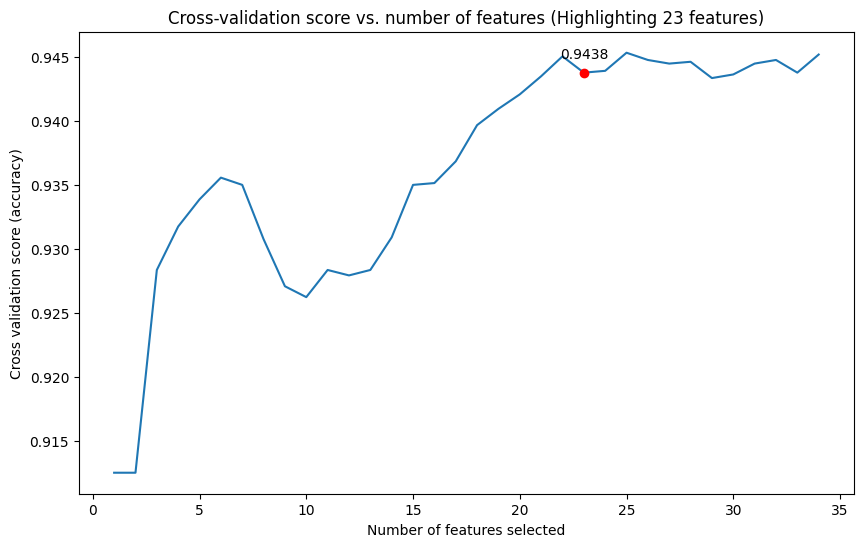

Cross-validation score with 23 features: 0.9438


In [ ]:
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

# Highlight the point at 24 features
num_features = 23
if 1 <= num_features <= len(rfecv.cv_results_['mean_test_score']):
    score_at_23 = rfecv.cv_results_['mean_test_score'][num_features - 1]
    plt.plot(num_features, score_at_23, 'ro') # 'ro' for red circle
    plt.annotate(f'{score_at_23:.4f}', (num_features, score_at_23), textcoords="offset points", xytext=(0,10), ha='center')


plt.title("Cross-validation score vs. number of features (Highlighting 23 features)")
plt.show()

print(f"Cross-validation score with {num_features} features: {rfecv.cv_results_['mean_test_score'][num_features - 1]:.4f}")

In [ ]:
# See which features were eliminated
eliminated = X_train1.columns[~rfecv.support_]
print(f"{len(eliminated)} features were eliminated:")
print(eliminated.tolist())

9 features were eliminated:
['Autoimmune_Case', 'Dermatologic_Case', 'Endocrine_Case', 'Hematologic_Case', 'Musculoskeletal_Case', 'Renal_Case', 'Respiratory_Case', 'Toxicologic_Case', 'Systemic Inflammatory Response Index']


**Extract the 23 Features**

In [ ]:
# Explicitly define the top 23 features based on the importance order from the previous step
best_features = ['Metabolic_Case', 'Oncologic_Case', 'Age_group', 'Mean Arterial Pressure',
                 'Triage color', 'Respiratory Rate', 'PCA_Oxygen Delivery Index', 'White Blood Cells',
                 'Basophils', 'Eosinophils', 'Platelets', 'Heart Rate', 'Gender_Male',
                 'Visit type_repeat', 'Cardiovascular_Case', 'Gastrointestinal_Case',
                 'Mean Corpuscular Volume', 'Red Cell Distribution Width', 'Triage Waiting Time',
                 'Infectious_Case', 'Case Category_medical', 'Case Category_surgical',
                 'Case Category_trauma']


# Select only the 23 best features
X_train = X_train1[best_features]
X_test = X_test1[best_features]

In [ ]:
X_train.to_excel("X_train_2_8.xlsx", index=False)  # Exclude row indices
X_test.to_excel("X_test_2_8.xlsx", index=False)  # Exclude row indices

y_tra.to_excel("y_train_2_8.xlsx", index=False)  # Exclude row indices
y_tes.to_excel("y_test_2_8.xlsx", index=False)  # Exclude row indices

In [ ]:
print("Train shape after :", X_train.shape)
print("Test shape after :", X_test.shape)  # Should match (rows may differ)

Train shape after : (7063, 23)
Test shape after : (1766, 23)


In [ ]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("\nMissing values in X_test:\n", X_test.isnull().sum())

Missing values in X_train:
 Metabolic_Case                 0
Oncologic_Case                 0
Age_group                      0
Mean Arterial Pressure         0
Triage color                   0
Respiratory Rate               0
PCA_Oxygen Delivery Index      0
White Blood Cells              0
Basophils                      0
Eosinophils                    0
Platelets                      0
Heart Rate                     0
Gender_Male                    0
Visit type_repeat              0
Cardiovascular_Case            0
Gastrointestinal_Case          0
Mean Corpuscular Volume        0
Red Cell Distribution Width    0
Triage Waiting Time            0
Infectious_Case                0
Case Category_medical          0
Case Category_surgical         0
Case Category_trauma           0
dtype: int64

Missing values in X_test:
 Metabolic_Case                 0
Oncologic_Case                 0
Age_group                      0
Mean Arterial Pressure         0
Triage color                   0
Respira

In [ ]:
from google.colab import files

files.download('X_train_2_8.xlsx')
files.download('X_test_2_8.xlsx')
files.download('y_train_2_8.xlsx')
files.download('y_test_2_8.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>